In [1]:
import sys, os
sys.path.insert(1, os.path.realpath(os.path.pardir))
from specs import *
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import t
from matplotlib.transforms import ScaledTranslation
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

rawDir = "/Users/jiyong/data/0804_container_detector_data/"
pn1Dir = rawDir + "P1_SN1222/"
pn2Dir = rawDir + "P2_SN1215/"
pn1files0 = [f for f in listdir(pn1Dir) if isfile(join(pn1Dir, f)) and f.endswith('mca')]
pn2files0 = [f for f in listdir(pn2Dir) if isfile(join(pn2Dir, f)) and f.endswith('mca')]

pn1files = [None] * len(pn1files0)
pn2files = [None] * len(pn2files0)

for f1 in pn1files0:
    ddd = (f1[1:-4].split("_"))[-1]
    if ddd == "BKG":
        pn1files[0] = pn1Dir+f1
    else :
        q = int(ddd.split("-")[-1])
        pn1files[q] = pn1Dir+f1
for f2 in pn2files0:
    ddd = (f2[1:-4].split("_"))[-1]
    if ddd == "BKG":
        pn2files[0] = pn2Dir+f2
    else :
        q = int(ddd.split("-")[-1])
        pn2files[q] = pn2Dir+f2


Log =[
    [0, ["Bkg"], 0, 0],                            # 0
    [1, ["Am241",], 80, 420],                      # 1
    [2, ["Am241",], 180, 320],                     # 2
    [3, ["Am241",], 280, 220],                     # 3
    [4, ["Am241",], 460, 40],                      # 4
    [5, ["Cs137",], 70, 430],                      # 5
    [6, ["Cs137",], 130, 370],                     # 6
    [7, ["Cs137",], 300, 200],                     # 7
    [8, ["Cs137",], 390, 110],                     # 8
    [9, ["Co60",], 60, 440],                       # 9
    [10, ["Co60",], 120, 380],                      # 10
    [11, ["Co60",], 310, 190],                      # 11
    [12, ["Co60",], 470, 30],                       # 12
    [13, ["Co60", "Cs137"], 136, 359],              # 13
    [14, ["Am241", "Co60"], 287, 208],              # 14
    [15, ["Co60", "Cs137"], 361, 134],              # 15
    [16, ["Am241", "Cs137"], 163, 332],
    [17, ["Am241", "Co60", "Cs137"], 309, 186],
    [18, ["Am241", "Co60",], 210, 285, 153, 342],
    [19, ["Co60", "Cs137"], 285, 210, 367, 128],
    [20, ["Am241", "Cs137"], 85, 410, 173, 322],
    [21, ["Co60", "Cs137"], 316, 179, 223, 272],
    [22, [None,], ],
]



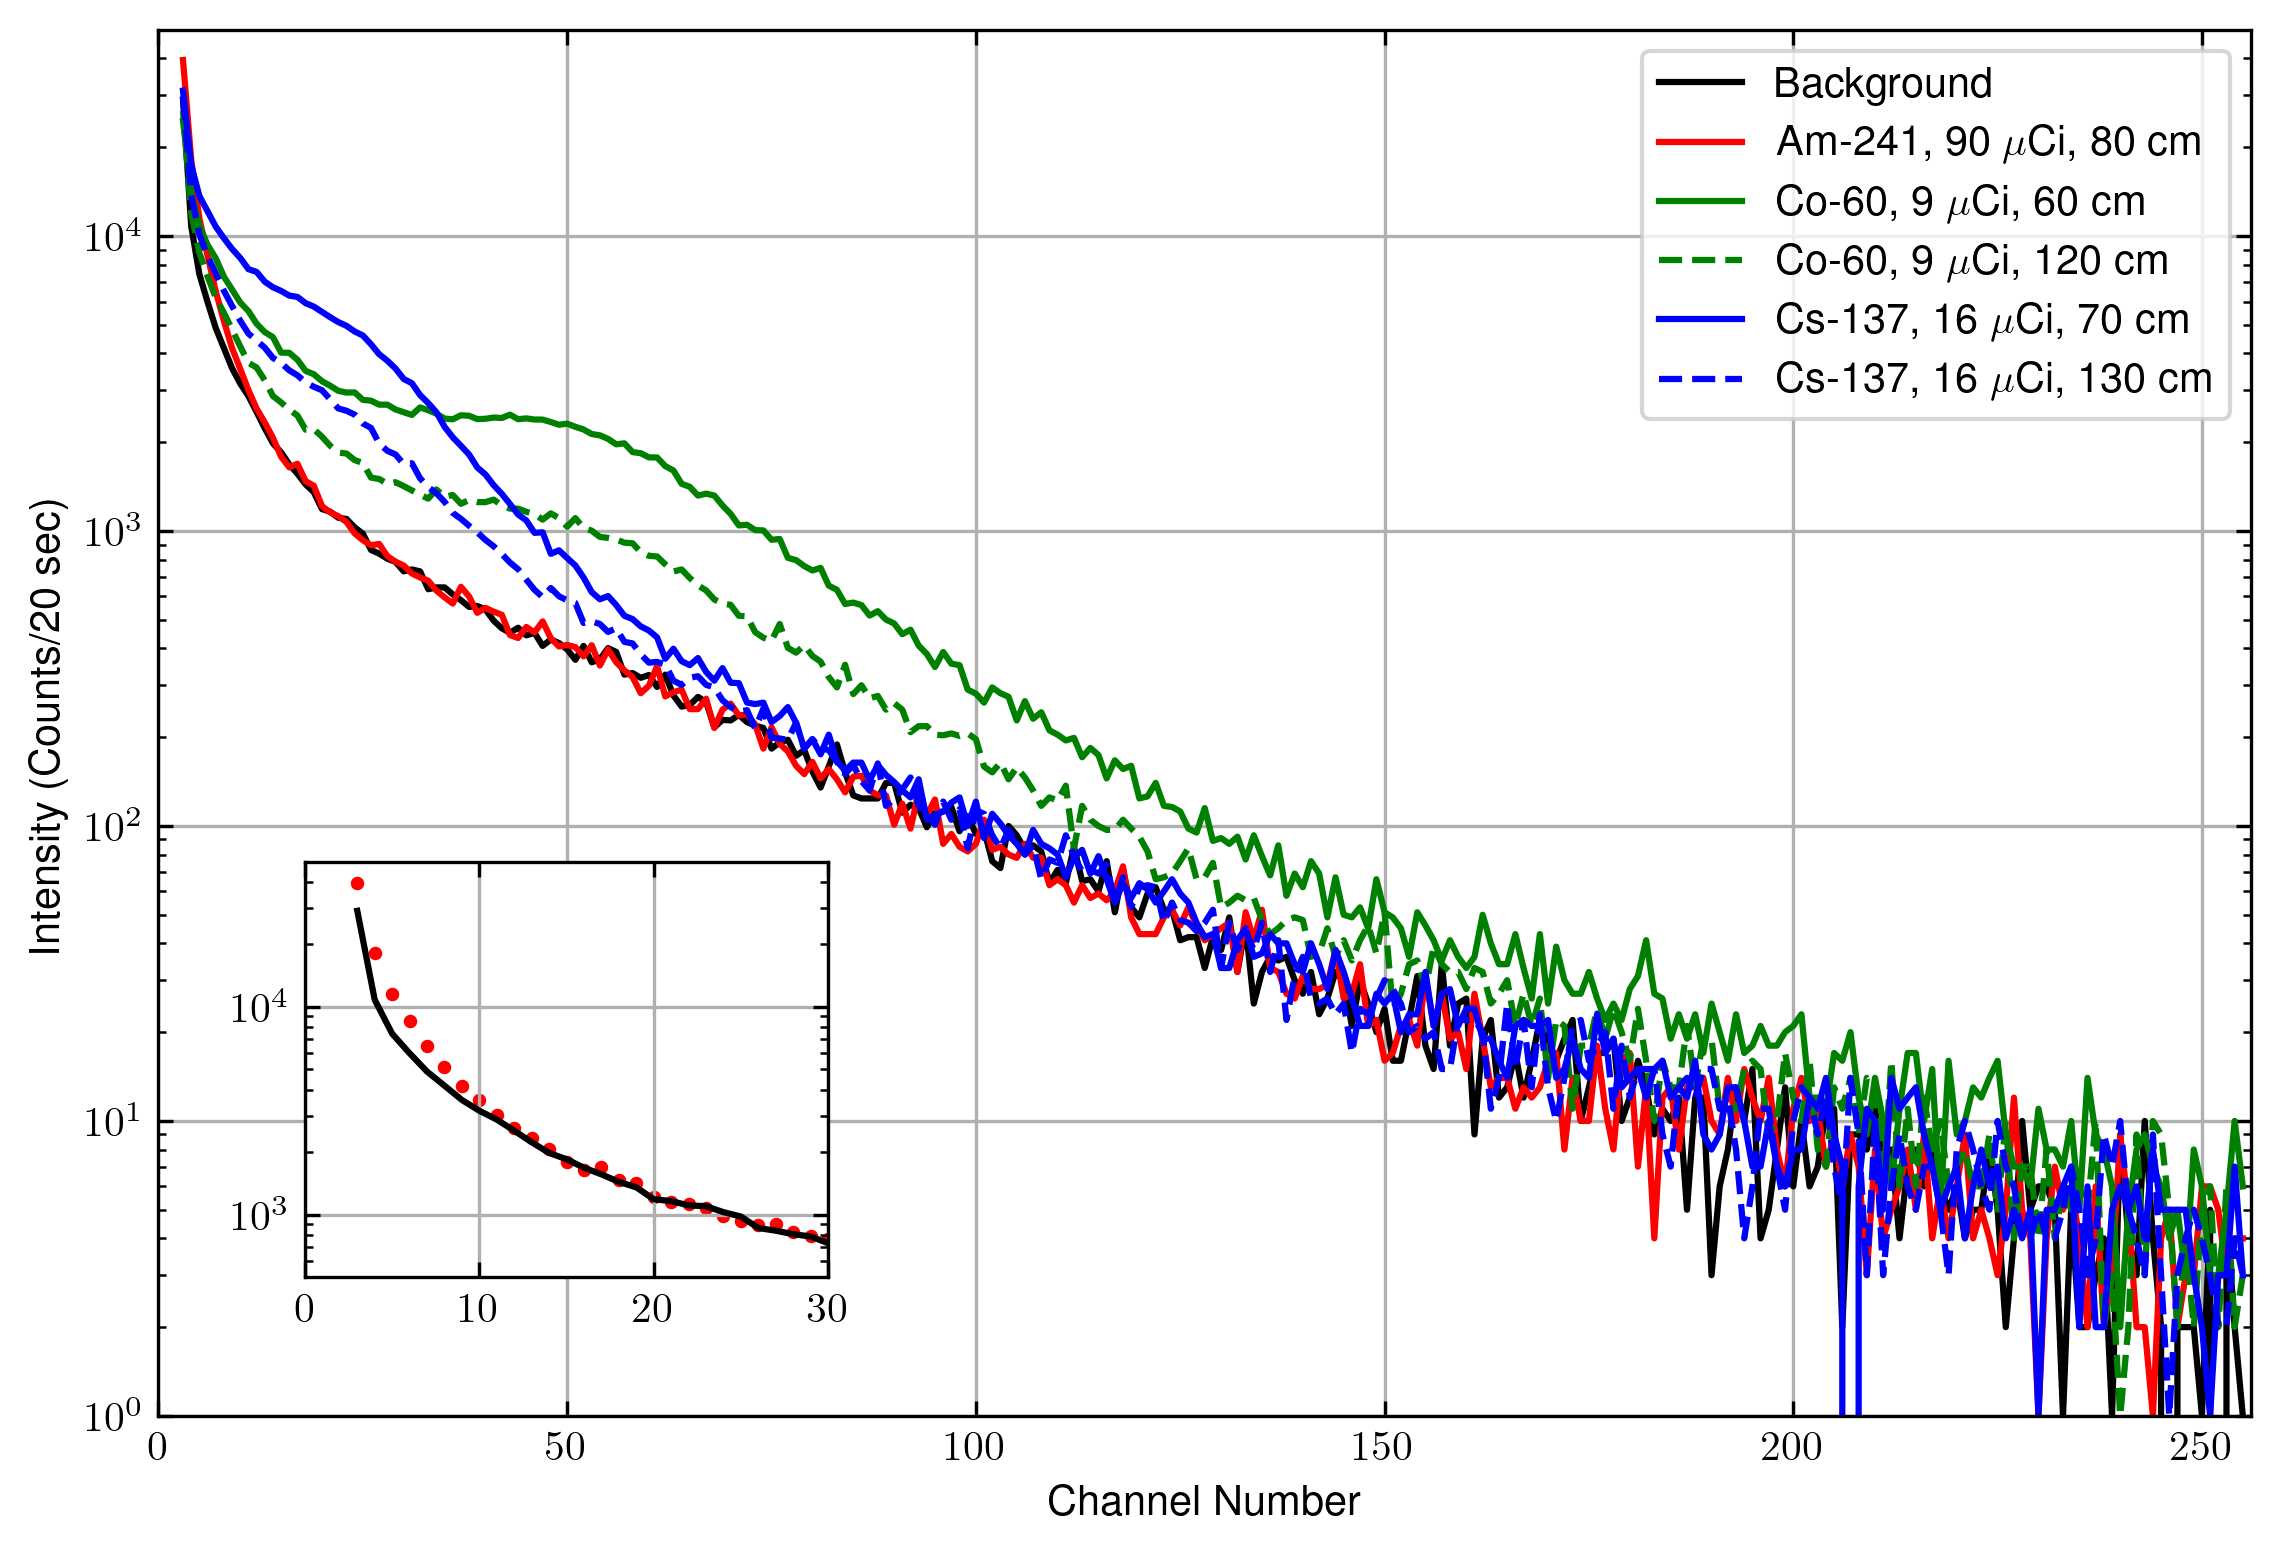

In [2]:
# PN1 data

ni = 3
Specs1 = pd.DataFrame( {
    "bkg" : read_mca(pn1files[0])[ni:], 
    "am_80" : read_mca(pn1files[1])[ni:],
    "cs_70" : read_mca(pn1files[5])[ni:],
    "cs_130" : read_mca(pn1files[6])[ni:],
    "co_120" : read_mca(pn1files[10])[ni:],
    "co_60" :  read_mca(pn1files[9])[ni:],
    "co_cs_136" : read_mca(pn1files[13])[ni:],
    "am_co_287" : read_mca(pn1files[14])[ni:],
    "co_cs_361" : read_mca(pn1files[15])[ni:],
    "am_cs_163" : read_mca(pn1files[16])[ni:],
    "am_co_cs_309" : read_mca(pn1files[17])[ni:],
    "am_210_co_153" : read_mca(pn1files[18])[ni:],
    "co_285_cs_367" : read_mca(pn1files[19])[ni:],
    "am_85_cs_173" : read_mca(pn1files[20])[ni:],
    "co_316_cs_223" : read_mca(pn1files[21])[ni:]
        
})

# PN2 data
Specs2 = pd.DataFrame( {
    "bkg" : read_mca(pn2files[0])[ni:], 
    "am_80" : read_mca(pn2files[1])[ni:],
    "cs_70" : read_mca(pn2files[5])[ni:],
    "cs_130" : read_mca(pn2files[6])[ni:],
    "co_120" : read_mca(pn2files[10])[ni:],
    "co_60" :  read_mca(pn2files[9])[ni:],
    "co_cs_136" : read_mca(pn2files[13])[ni:],
    "am_co_287" : read_mca(pn2files[14])[ni:],
    "co_cs_361" : read_mca(pn2files[15])[ni:],
    "am_cs_163" : read_mca(pn2files[16])[ni:],
    "am_co_cs_309" : read_mca(pn2files[17])[ni:],
    "am_210_co_153" : read_mca(pn2files[18])[ni:],
    "co_285_cs_367" : read_mca(pn2files[19])[ni:],
    "am_85_cs_173" : read_mca(pn2files[20])[ni:],
    "co_316_cs_223" : read_mca(pn2files[21])[ni:]
        
})

plt.figure(figsize=(9, 6), dpi=300)
channel = np.arange(ni,len(Specs1["bkg"])+ni)
plt.plot(channel, Specs1["bkg"], color="black", label = "Background")
plt.plot(channel, Specs1["am_80"], color = "red", label = "Am-241, 90 $\\mu$Ci, 80 cm")
plt.plot(channel, Specs1["co_60"], color="green", label = "Co-60, 9 $\\mu$Ci, 60 cm")
plt.plot(channel, Specs1["co_120"], "--", color = "green", label = "Co-60, 9 $\\mu$Ci, 120 cm")
plt.plot(channel, Specs1["cs_70"],  color = "blue", label = "Cs-137, 16 $\\mu$Ci, 70 cm")
plt.plot(channel, Specs1["cs_130"], "--", color = "blue", label = "Cs-137, 16 $\\mu$Ci, 130 cm")

plt.legend()
plt.grid()
plt.yscale("log", base=10)
plt.ylim(1, 5e4)
plt.xlim(0, 256)
plt.xlabel("Channel Number")
plt.ylabel("Intensity (Counts/20 sec)")

ax = plt.gca()
x1, x2, y1, y2 = 0, 30, 5e2, 5.0e4  # subregion of the original image
axins = ax.inset_axes(
    [0.07, 0.1, 0.25, 0.3],
    xlim=(x1, x2), ylim=(y1, y2))#, xticklabels=[0, 20, 40], yticklabels=[1.0e3, 1.0e4])
axins.plot(channel, Specs1["bkg"], color="black", label = "Background")
axins.scatter(channel, Specs1["am_80"], color = "red", s=5, label = "Am-241, 90 $\\mu$Ci, 80 cm")
# axins.plot(channel, Specs1["co_60"], color="green", label = "Co-60, 9 $\\mu$Ci, 60 cm")
# axins.plot(channel, Specs1["co_120"], "--", color = "green", label = "Co-60, 9 $\\mu$Ci, 120 cm")
# axins.plot(channel, Specs1["cs_70"],  color = "blue", label = "Cs-137, 16 $\\mu$Ci, 70 cm")
# axins.plot(channel, Specs1["cs_130"], "--", color = "blue", label = "Cs-137, 16 $\\mu$Ci, 130 cm")
axins.set_yscale("log", base=10)
axins.grid(True)
# plt.title("Fig 1")

plt.savefig("../../src/newfigures/figure1.pdf")

Text(0.5, -0.5, '(b)')

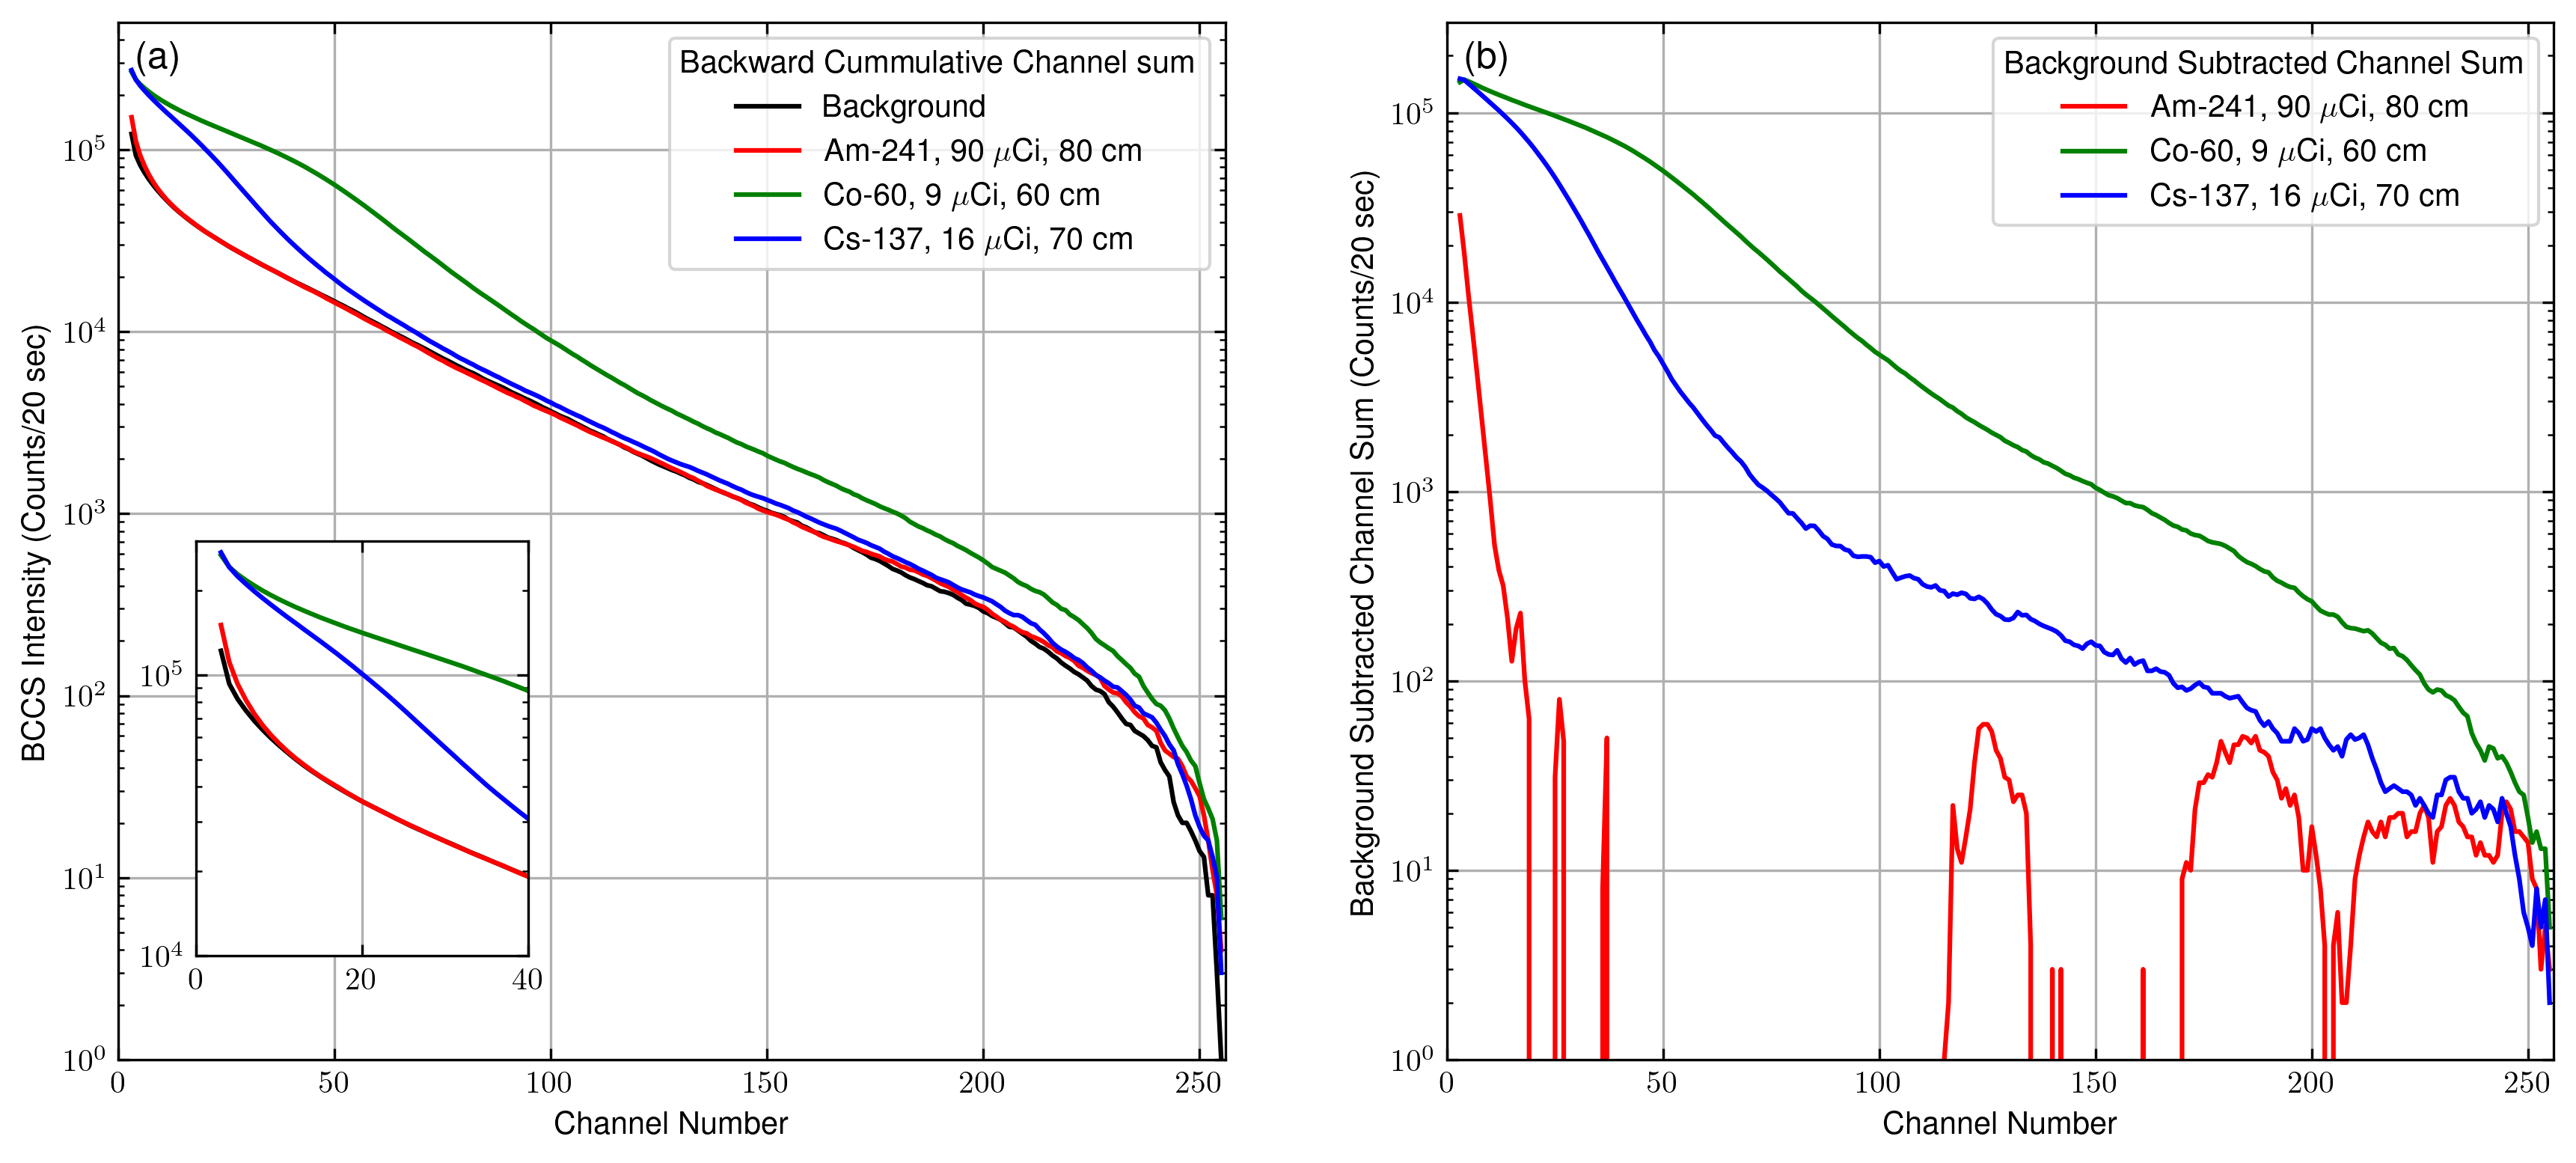

In [3]:
_bccs1, _bccs2, _bccsbkg1, _bccsbkg2, _bccsrto1, _bccsrto2 = {}, {}, {}, {}, {}, {}
for kk in Specs1.keys():
    _bccs1[kk] = bccs(Specs1[kk])
    if kk == "bkg":
        _bkg1 = bccs(Specs1[kk])
    else :
        _bccsbkg1[kk] = _bccs1[kk] - _bkg1
        _bccsrto1[kk] =  _bccs1[kk] / _bkg1 - 1.0

for kk in Specs2.keys():
    _bccs2[kk] = bccs(Specs2[kk])
    if kk == "bkg":
        _bkg2 = bccs(Specs2[kk])
    else :
        _bccsbkg2[kk] = _bccs1[kk] - _bkg2
        _bccsrto2[kk] = _bccs1[kk] / _bkg2 - 1.0


BCCS1 = pd.DataFrame(_bccs1)
BCCS2 = pd.DataFrame(_bccs2)
BCCSSub1 = pd.DataFrame(_bccsbkg1)
BCCSSub2 = pd.DataFrame(_bccsbkg2)
BCCSRto1 = pd.DataFrame(_bccsrto1)
BCCSRto2 = pd.DataFrame(_bccsrto2)

plt.figure(figsize=(14, 6), dpi=300)
plt.subplot(121)
plt.plot(channel, BCCS1["bkg"], color="black", label = "Background")
plt.plot(channel, BCCS1["am_80"], color = "red", label = "Am-241, 90 $\\mu$Ci, 80 cm")
plt.plot(channel, BCCS1["co_60"], color="green", label = "Co-60, 9 $\\mu$Ci, 60 cm")
#plt.plot(channel, BCCS1["co_120"], "--", color = "green", label = "Co-60, 9 $\\mu$Ci, 120 cm")
plt.plot(channel, BCCS1["cs_70"],  color = "blue", label = "Cs-137, 16 $\\mu$Ci, 70 cm")
#plt.plot(channel, BCCS1["cs_130"], "--", color = "blue", label = "Cs-137, 16 $\\mu$Ci, 130 cm")


plt.legend(title = "Backward Cummulative Channel sum")
plt.grid()
plt.yscale("log", base=10)
plt.ylim(1, 5e5)
plt.xlim(0, 256)

plt.xlabel("Channel Number")
plt.ylabel("BCCS Intensity (Counts/20 sec)")

ax = plt.gca()
ff = plt.gcf()
ax.annotate(
        "(a)",
        xy=(0, 1), xycoords='axes fraction',
        xytext=(+0.5, -0.5), textcoords='offset fontsize',
        fontsize='large', verticalalignment='top')#, fontfamily='serif'
        # bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))
x1, x2, y1, y2 = 0, 40, 1e4, 3.0e5  
axins = ax.inset_axes(
    [0.07, 0.1, 0.3, 0.4],
    xlim=(x1, x2), ylim=(y1, y2))#, xticklabels=[0, 20, 40], yticklabels=[1.0e3, 1.0e4])
axins.plot(channel, BCCS1["bkg"], color="black", label = "Background")
axins.plot(channel, BCCS1["am_80"], color = "red", label = "Am-241, 90 $\\mu$Ci, 80 cm")
axins.plot(channel, BCCS1["co_60"], color="green", label = "Co-60, 9 $\\mu$Ci, 60 cm")
#axins.plot(channel, BCCS1["co_120"], "--", color = "green", label = "Co-60, 9 $\\mu$Ci, 120 cm")
axins.plot(channel, BCCS1["cs_70"],  color = "blue", label = "Cs-137, 16 $\\mu$Ci, 70 cm")
#axins.plot(channel, BCCS1["cs_130"], "--", color = "blue", label = "Cs-137, 16 $\\mu$Ci, 130 cm")
axins.set_yscale("log", base=10)
axins.grid(True)
# plt.title("Fig 2.-PN1")

# plt.subplot(122)
# plt.plot(channel, BCCS2["bkg"], color="black", label = "Background")
# plt.plot(channel, BCCS2["am_80"], color = "red", label = "Am-241, 90 $\\mu$Ci, 80 cm")
# plt.plot(channel, BCCS2["co_120"], color = "green", label = "Co-60, 9 $\\mu$Ci, 120 cm")
# plt.plot(channel, BCCS2["co_60"], "--", color="green", label = "Co-60, 9 $\\mu$Ci, 60 cm")
# plt.plot(channel, BCCS2["cs_130"], color = "blue", label = "Cs-137, 16 $\\mu$Ci, 130 cm")
# plt.plot(channel, BCCS2["cs_70"], "--", color = "blue", label = "Cs-137, 16 $\\mu$Ci, 70 cm")

# plt.legend(title = "Channel sum")
# plt.grid()
# plt.yscale("log", base=10)
# plt.ylim(1, 5e5)
# plt.xlim(0, 256)
# plt.title("Fig 2.-PN2")

plt.subplot(122)
plt.plot(channel, BCCSSub1["am_80"], color = "red", label = "Am-241, 90 $\\mu$Ci, 80 cm")
plt.plot(channel, BCCSSub1["co_60"] ,  color="green", label = "Co-60, 9 $\\mu$Ci, 60 cm")
#plt.plot(channel, BCCSSub1["co_120"], "--",color = "green", label = "Co-60, 9 $\\mu$Ci, 120 cm")
plt.plot(channel, BCCSSub1["cs_70"] ,  color = "blue", label = "Cs-137, 16 $\\mu$Ci, 70 cm")
#plt.plot(channel, BCCSSub1["cs_130"], "--",color = "blue", label = "Cs-137, 16 $\\mu$Ci, 130 cm")


plt.legend(title="Background Subtracted Channel Sum")
plt.grid()
plt.yscale("log", base=10)
plt.ylim(1, 3e5)
plt.xlim(0, 256)
plt.xlabel("Channel Number")
plt.ylabel("Background Subtracted Channel Sum (Counts/20 sec)")
ax = plt.gca()
ff = plt.gcf()
ax.annotate(
        "(b)",
        xy=(0, 1), xycoords='axes fraction',
        xytext=(+0.5, -0.5), textcoords='offset fontsize',
        fontsize='large', verticalalignment='top')
# plt.savefig("../../src/newfigures/figure2.pdf")


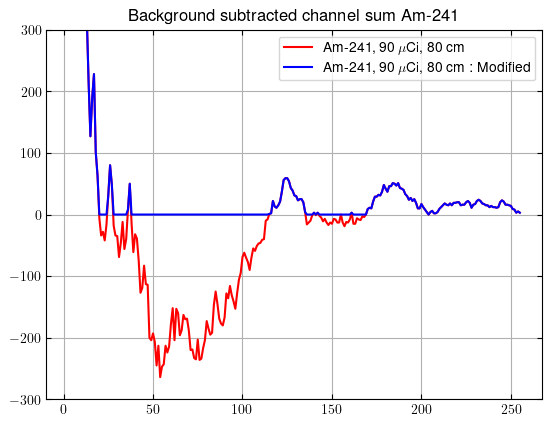

In [4]:
plt.plot(channel, BCCSSub1["am_80"], color = "red", label = "Am-241, 90 $\\mu$Ci, 80 cm")
plt.ylim(-300, 300)
plt.grid()
plt.title("Background subtracted channel sum Am-241")
BCCSSub1.loc[BCCSSub1["am_80"]<0, "am_80"] = 0
plt.plot(channel, BCCSSub1["am_80"], color = "blue", label = "Am-241, 90 $\\mu$Ci, 80 cm : Modified")
plt.legend()

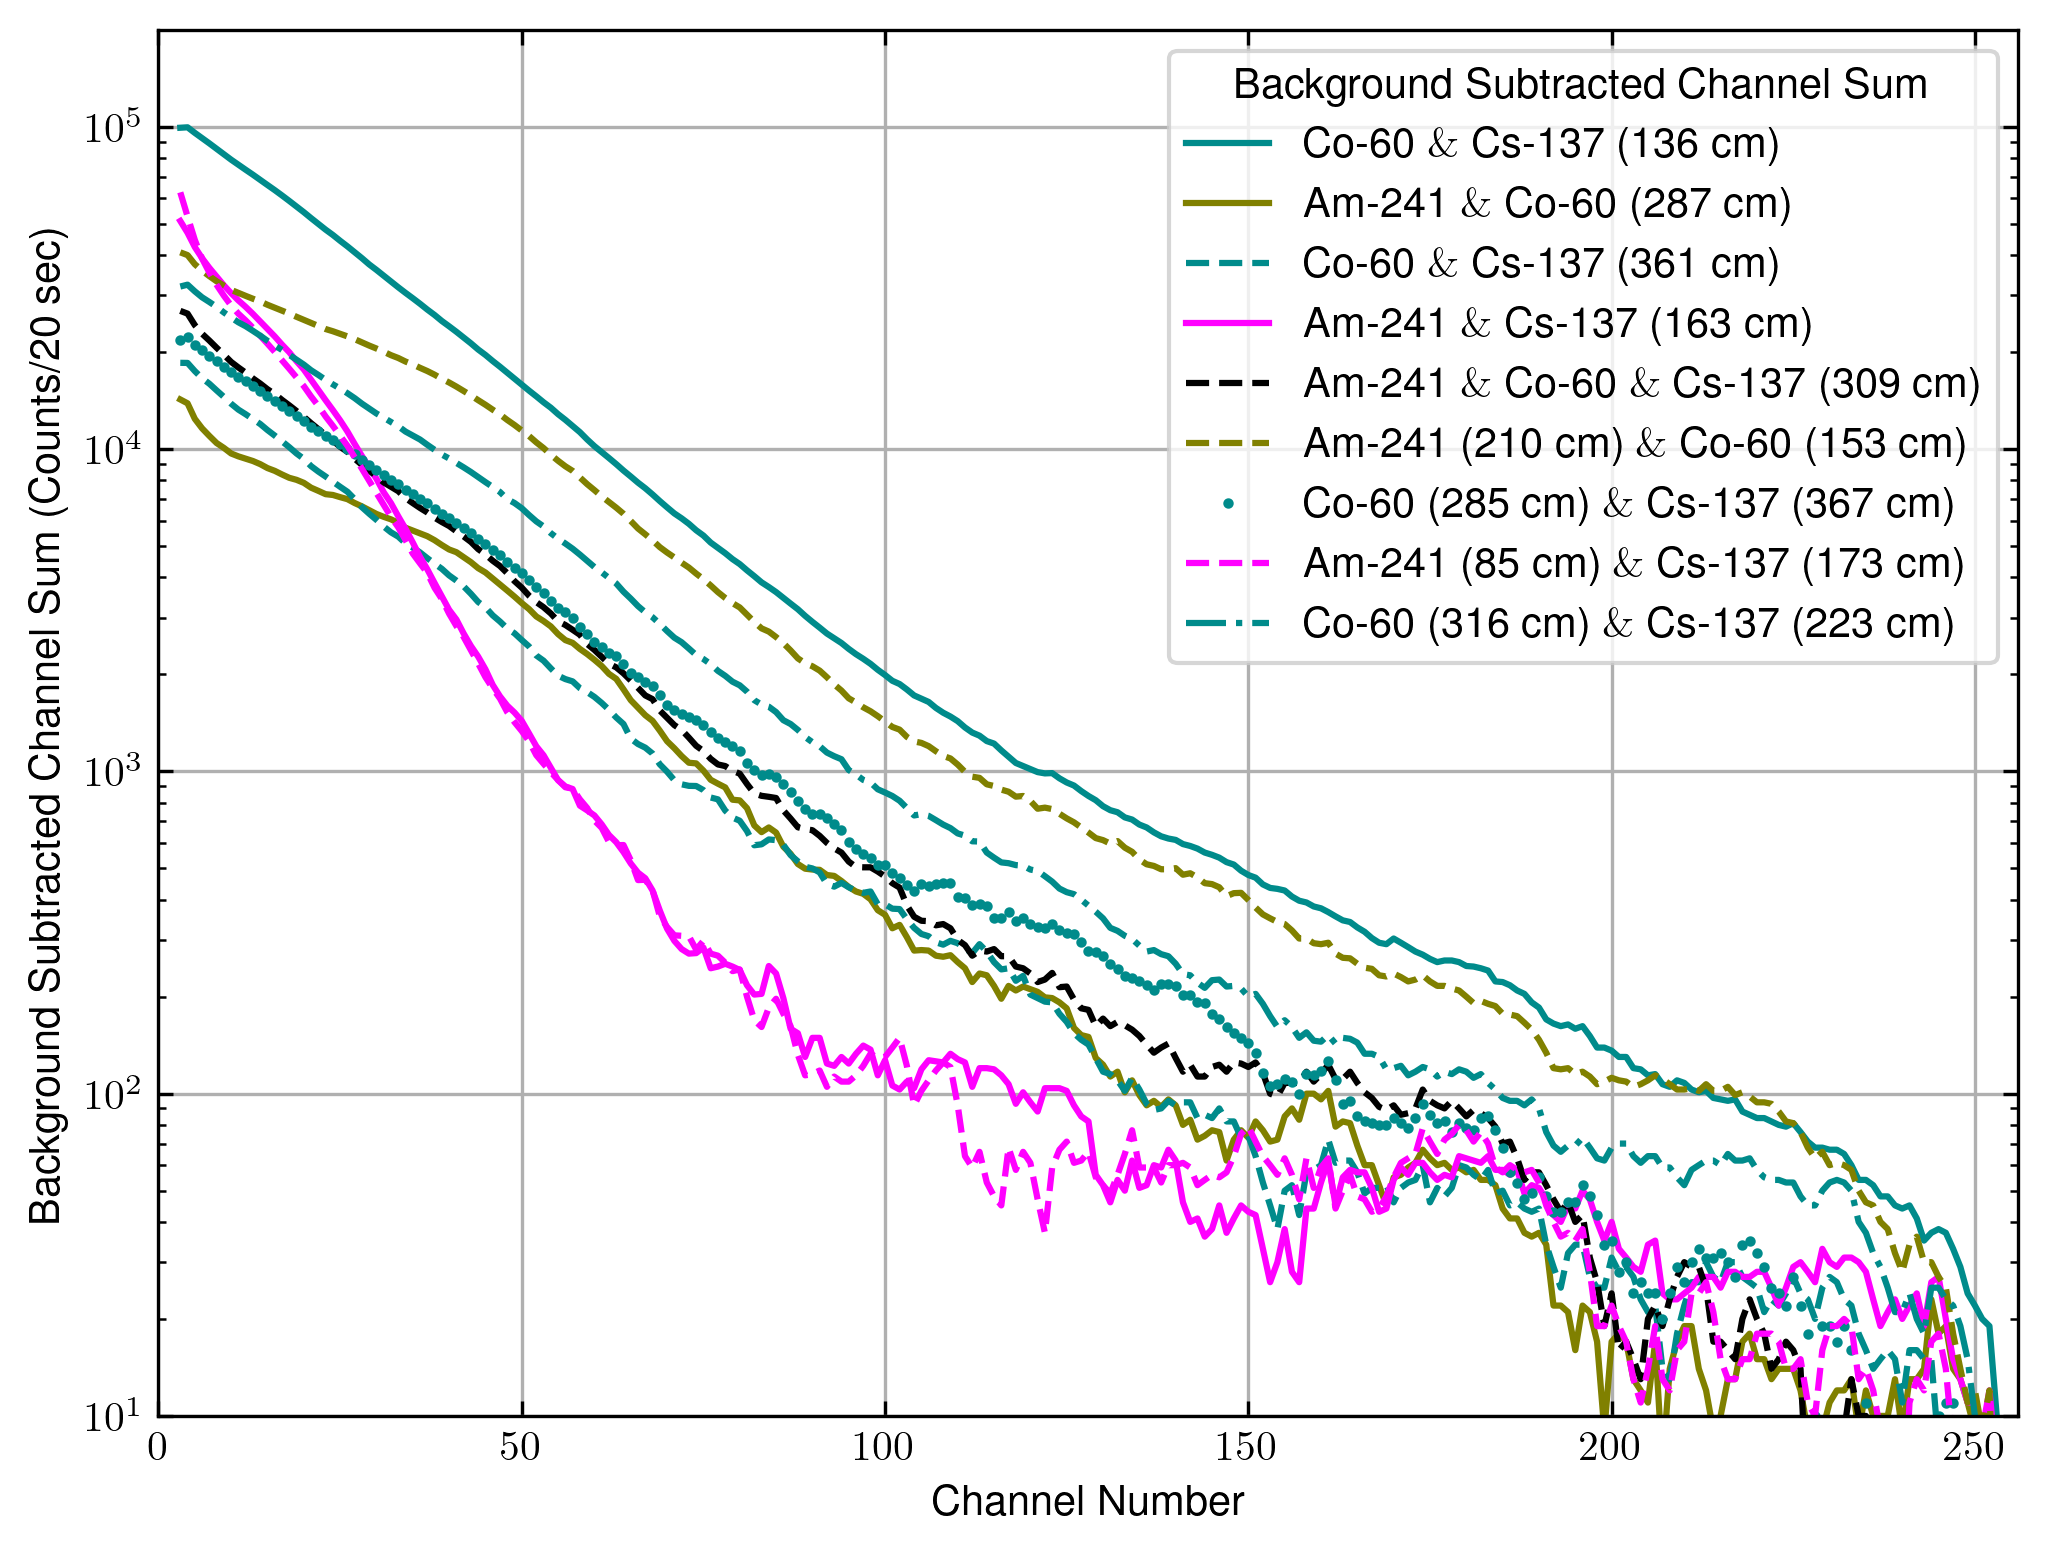

In [10]:
plt.figure(figsize=(8, 6), dpi = 300)
plt.subplot(111)
plt.plot(channel, BCCSSub1["co_cs_136"], color = "darkcyan", label = "Co-60 $\\&$ Cs-137 (136 cm)")
plt.plot(channel, BCCSSub1["am_co_287"], color = "olive", label = "Am-241 $\\&$ Co-60 (287 cm)")
plt.plot(channel, BCCSSub1["co_cs_361"] , "--", color = "darkcyan", label = "Co-60 $\\&$  Cs-137 (361 cm)")
plt.plot(channel, BCCSSub1["am_cs_163"], color = "magenta", label = "Am-241 $\\&$ Cs-137 (163 cm)")
plt.plot(channel, BCCSSub1["am_co_cs_309"] , "--", color="black", label = "Am-241 $\\&$ Co-60 $\\&$ Cs-137 (309 cm)")
plt.plot(channel, BCCSSub1["am_210_co_153"] , "--", color="olive", label = "Am-241 (210 cm) $\\&$ Co-60 (153 cm)")
plt.plot(channel, BCCSSub1["co_285_cs_367"] , ".", ms=3, color="darkcyan", label = "Co-60 (285 cm) $\\&$ Cs-137 (367 cm)")
plt.plot(channel, BCCSSub1["am_85_cs_173"] , "--", color="magenta", label = "Am-241 (85 cm) $\\&$ Cs-137 (173 cm)")
plt.plot(channel, BCCSSub1["co_316_cs_223"] , "-.", color="darkcyan", label = "Co-60 (316 cm) $\\&$ Cs-137 (223 cm)")

plt.grid()
plt.yscale("log", base=10)
plt.ylim(10, 2e5)
plt.xlim(0, 256)
plt.xlabel("Channel Number")
plt.ylabel("Background Subtracted Channel Sum (Counts/20 sec)")
plt.legend(title="Background Subtracted Channel Sum")
ax = plt.gca()

# ax.annotate(
#         "(a)",
#         xy=(0, 1), xycoords='axes fraction',
#         xytext=(+0.5, -0.5), textcoords='offset fontsize',
#         fontsize='large', verticalalignment='top')

# plt.subplot(122)
# plt.plot(channel, BCCSSub2["co_cs_136"], color = "cyan", label = "Co-60 $\\&$ Cs-137 (136 cm)")
# plt.plot(channel, BCCSSub2["am_co_287"], color = "olive", label = "Am-241 $\\&$ Co-60 (287 cm)")
# plt.plot(channel, BCCSSub2["co_cs_361"] , "--", color = "cyan", label = "Co-60 $\\&$ Cs-137 (361 cm)")
# plt.plot(channel, BCCSSub2["am_cs_63"], color = "magenta", label = "Am-241 $\\&$ Cs-137 (63 cm)")
# plt.plot(channel, BCCSSub2["am_co_cs_309"] , "--", color="black", label = "Am-241 $\\&$ Co-60 $\\&$ Cs-137 (309 cm)")
# plt.plot(channel, BCCSSub2["am_210_co_153"] , "--", color="olive", label = "Am-241 (210 cm) $\\&$ Co-60 (153 cm)")
# plt.plot(channel, BCCSSub2["co_285_cs_367"] , ".", color="cyan", label = "Co-60 (285 cm) $\\&$ Cs-137 (367 cm)")
# plt.plot(channel, BCCSSub2["am_85_cs_173"] , "--", color="magenta", label = "Am-241 (85 cm) $\\&$ Cs-137 (173 cm)")
# plt.plot(channel, BCCSSub2["co_316_cs_223"] , "-.", color="cyan", label = "Co-60 (316 cm) $\\&$ Cs-137 (223 cm)")
# plt.legend(title="Background Subtracted Channel Sum")
# plt.grid()
# plt.yscale("log", base=10)
# plt.ylim(1, 1.2e5)
# plt.xlim(0, 256)
# ax = plt.gca()
# ax.annotate(
#         "(b)",
#         xy=(0, 1), xycoords='axes fraction',
#         xytext=(+0.5, -0.5), textcoords='offset fontsize',
#         fontsize='large', verticalalignment='top')
plt.savefig("../../src/newfigures/figure3.pdf")

In [ ]:
plt.plot(channel, BCCSRto1["am_80"], color = "red", label = "Am-241, 90 $\\mu$Ci, 80 cm")
plt.plot(channel, BCCSRto1["co_120"], color = "green", label = "Co-60, 9 $\\mu$Ci, 120 cm")
plt.plot(channel, BCCSRto1["co_60"] , "--", color="green", label = "Co-60, 9 $\\mu$Ci, 60 cm")
plt.plot(channel, BCCSRto1["cs_130"], color = "blue", label = "Cs-137, 16 $\\mu$Ci, 130 cm")
plt.plot(channel, BCCSRto1["cs_70"] , "--", color = "blue", label = "Cs-137, 16 $\\mu$Ci, 70 cm")
plt.legend(title="Background Ratio Normalization")
plt.grid()
#plt.yscale("log", base=10)
plt.ylim(0, 4)
plt.xlim(0, 256)
plt.title("Fig 3")

Text(0.5, 1.0, 'Fig 4-PN2')

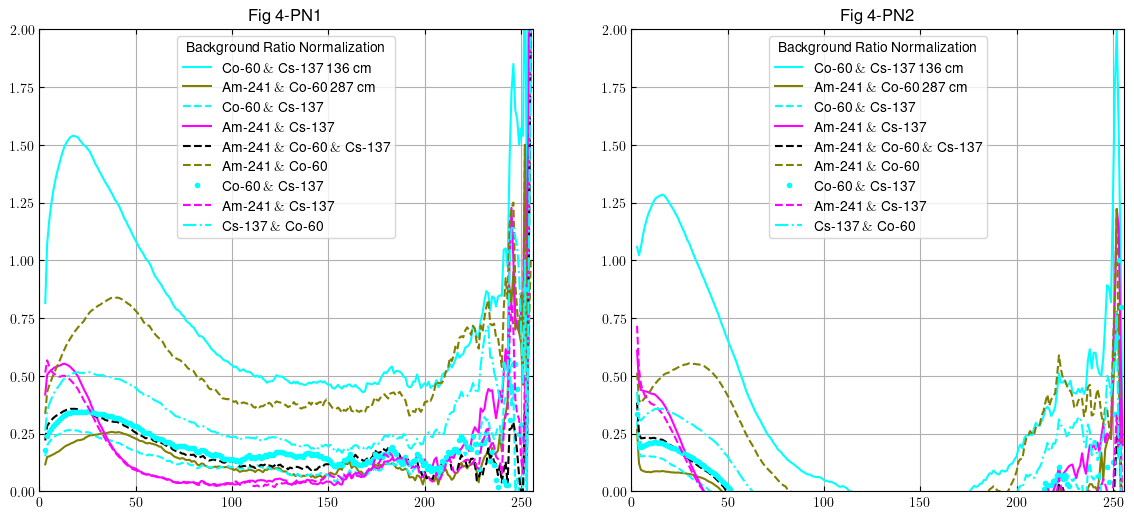

In [11]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.plot(channel, BCCSRto1["co_cs_136"], color = "cyan", label = "Co-60 $\\&$ Cs-137 136 cm")
plt.plot(channel, BCCSRto1["am_co_287"], color = "olive", label = "Am-241 $\\&$ Co-60 287 cm")
plt.plot(channel, BCCSRto1["co_cs_361"] , "--", color = "cyan", label = "Co-60 $\\&$  Cs-137 ")
plt.plot(channel, BCCSRto1["am_cs_163"], color = "magenta", label = "Am-241 $\\&$ Cs-137")
plt.plot(channel, BCCSRto1["am_co_cs_309"] , "--", color="black", label = "Am-241 $\\&$ Co-60 $\\&$ Cs-137")
plt.plot(channel, BCCSRto1["am_210_co_153"] , "--", color="olive", label = "Am-241 $\\&$ Co-60")
plt.plot(channel, BCCSRto1["co_285_cs_367"] , ".", color="cyan", label = "Co-60 $\\&$ Cs-137")
plt.plot(channel, BCCSRto1["am_85_cs_173"] , "--", color="magenta", label = "Am-241 $\\&$ Cs-137")
plt.plot(channel, BCCSRto1["co_316_cs_223"] , "-.", color="cyan", label = "Cs-137 $\\&$ Co-60")
plt.legend(title="Background Ratio Normalization")
plt.grid()
# plt.yscale("log", base=10)
plt.ylim(0, 2)
plt.xlim(0, 256)
plt.title("Fig 4-PN1")

plt.subplot(122)
plt.plot(channel, BCCSRto2["co_cs_136"], color = "cyan", label = "Co-60 $\\&$ Cs-137 136 cm")
plt.plot(channel, BCCSRto2["am_co_287"], color = "olive", label = "Am-241 $\\&$ Co-60 287 cm")
plt.plot(channel, BCCSRto2["co_cs_361"] , "--", color = "cyan", label = "Co-60 $\\&$  Cs-137 ")
plt.plot(channel, BCCSRto2["am_cs_163"], color = "magenta", label = "Am-241 $\\&$ Cs-137")
plt.plot(channel, BCCSRto2["am_co_cs_309"] , "--", color="black", label = "Am-241 $\\&$ Co-60 $\\&$ Cs-137")
plt.plot(channel, BCCSRto2["am_210_co_153"] , "--", color="olive", label = "Am-241 $\\&$ Co-60")
plt.plot(channel, BCCSRto2["co_285_cs_367"] , ".", color="cyan", label = "Co-60 $\\&$ Cs-137")
plt.plot(channel, BCCSRto2["am_85_cs_173"] , "--", color="magenta", label = "Am-241 $\\&$ Cs-137")
plt.plot(channel, BCCSRto2["co_316_cs_223"] , "-.", color="cyan", label = "Cs-137 $\\&$ Co-60")
plt.legend(title="Background Ratio Normalization")
plt.grid()
# plt.yscale("log", base=10)
plt.ylim(0, 2)
plt.xlim(0, 256)
plt.title("Fig 4-PN2")

In [ ]:
# def BCCSfit(params, spectrum, refspecs = {}, idf=None, plot=False):
#     """Fit the spectrum to a linear combination of reference spectra.
#     """ 
#     if idf == None :
#         idf = len(spectrum)
        
#     amspec = refspecs["Am"][0:idf]
#     cospec = refspecs["Co"][0:idf]
#     csspec = refspecs["Cs"][0:idf]
#     def detfunc(params, xdata, ydata):
#         a, b, c = params[0:3]
#         return ydata - (abs(a)*amspec + abs(b)*cospec + abs(c)*csspec)

    
#     fr1 = optimization.leastsq(detfunc, params, args=(np.arange(len(spectrum)), spectrum[0:idf]), full_output=True)
    
    
#     if plot:
#         plt.figure(figsize=(12, 6))
#         plt.plot(spectrum, label="Spectrum", color="black")
#         plt.plot(fr1[0]*amspec, label="Am-241", color="blue")
#         plt.plot(fr1[1]*cospec, label="Co-60", color="red")
#         plt.plot(fr1[2]*csspec, label="Cs-137", color="green")
#         plt.plot(fr1[0]*amspec + fr1[1]*cospec + fr1[2]*csspec, label="Fitted", color="violet")
#         plt.yscale("log", base=10)
#         plt.ylim(1.0, spectrum[0]*2)
#         plt.legend()
#         plt.title("Spectrum Fit")
#         plt.show()
#     return fr1[0:2]

def BCCSfit(params, spectrum, refspecs = {}, idf=None, plot=False):
    """Fit the spectrum to a linear combination of reference spectra.
    """ 
    if idf == None :
        idf = len(spectrum)
        
    amspec = refspecs["Am"][0:idf]
    cospec = refspecs["Co"][0:idf]
    csspec = refspecs["Cs"][0:idf]
    
    def detfunc(xdata, a,b,c):
        
        return abs(a)*amspec + abs(b)*cospec + abs(c)*csspec

    popt, pconv = optimization.curve_fit(detfunc, np.arange(len(spectrum[0:idf])), spectrum[0:idf], params, absolute_sigma=True)
    
    # 표준오차(SE)와 95% 신뢰구간
    n, p = idf, len(popt)
    dof = max(0, n - p)
    se = np.sqrt(np.diag(pconv))
    tval = t.ppf(0.975, dof)
    ci = np.column_stack([popt - tval*se, popt + tval*se])

    if plot:
        plt.figure(figsize=(12, 6))
        plt.plot(spectrum, label="Spectrum", color="black")
        plt.plot(popt[0]*amspec, label="Am-241", color="blue")
        plt.plot(popt[1]*cospec, label="Co-60", color="red")
        plt.plot(popt[2]*csspec, label="Cs-137", color="green")
        plt.plot(popt[0]*amspec + popt[1]*cospec + popt[2]*csspec, label="Fitted", color="violet")
        plt.yscale("log", base=10)
        plt.ylim(1.0, spectrum[0]*2)
        plt.legend()
        plt.title("Spectrum Fit")
        plt.show()
    return popt, se, pconv



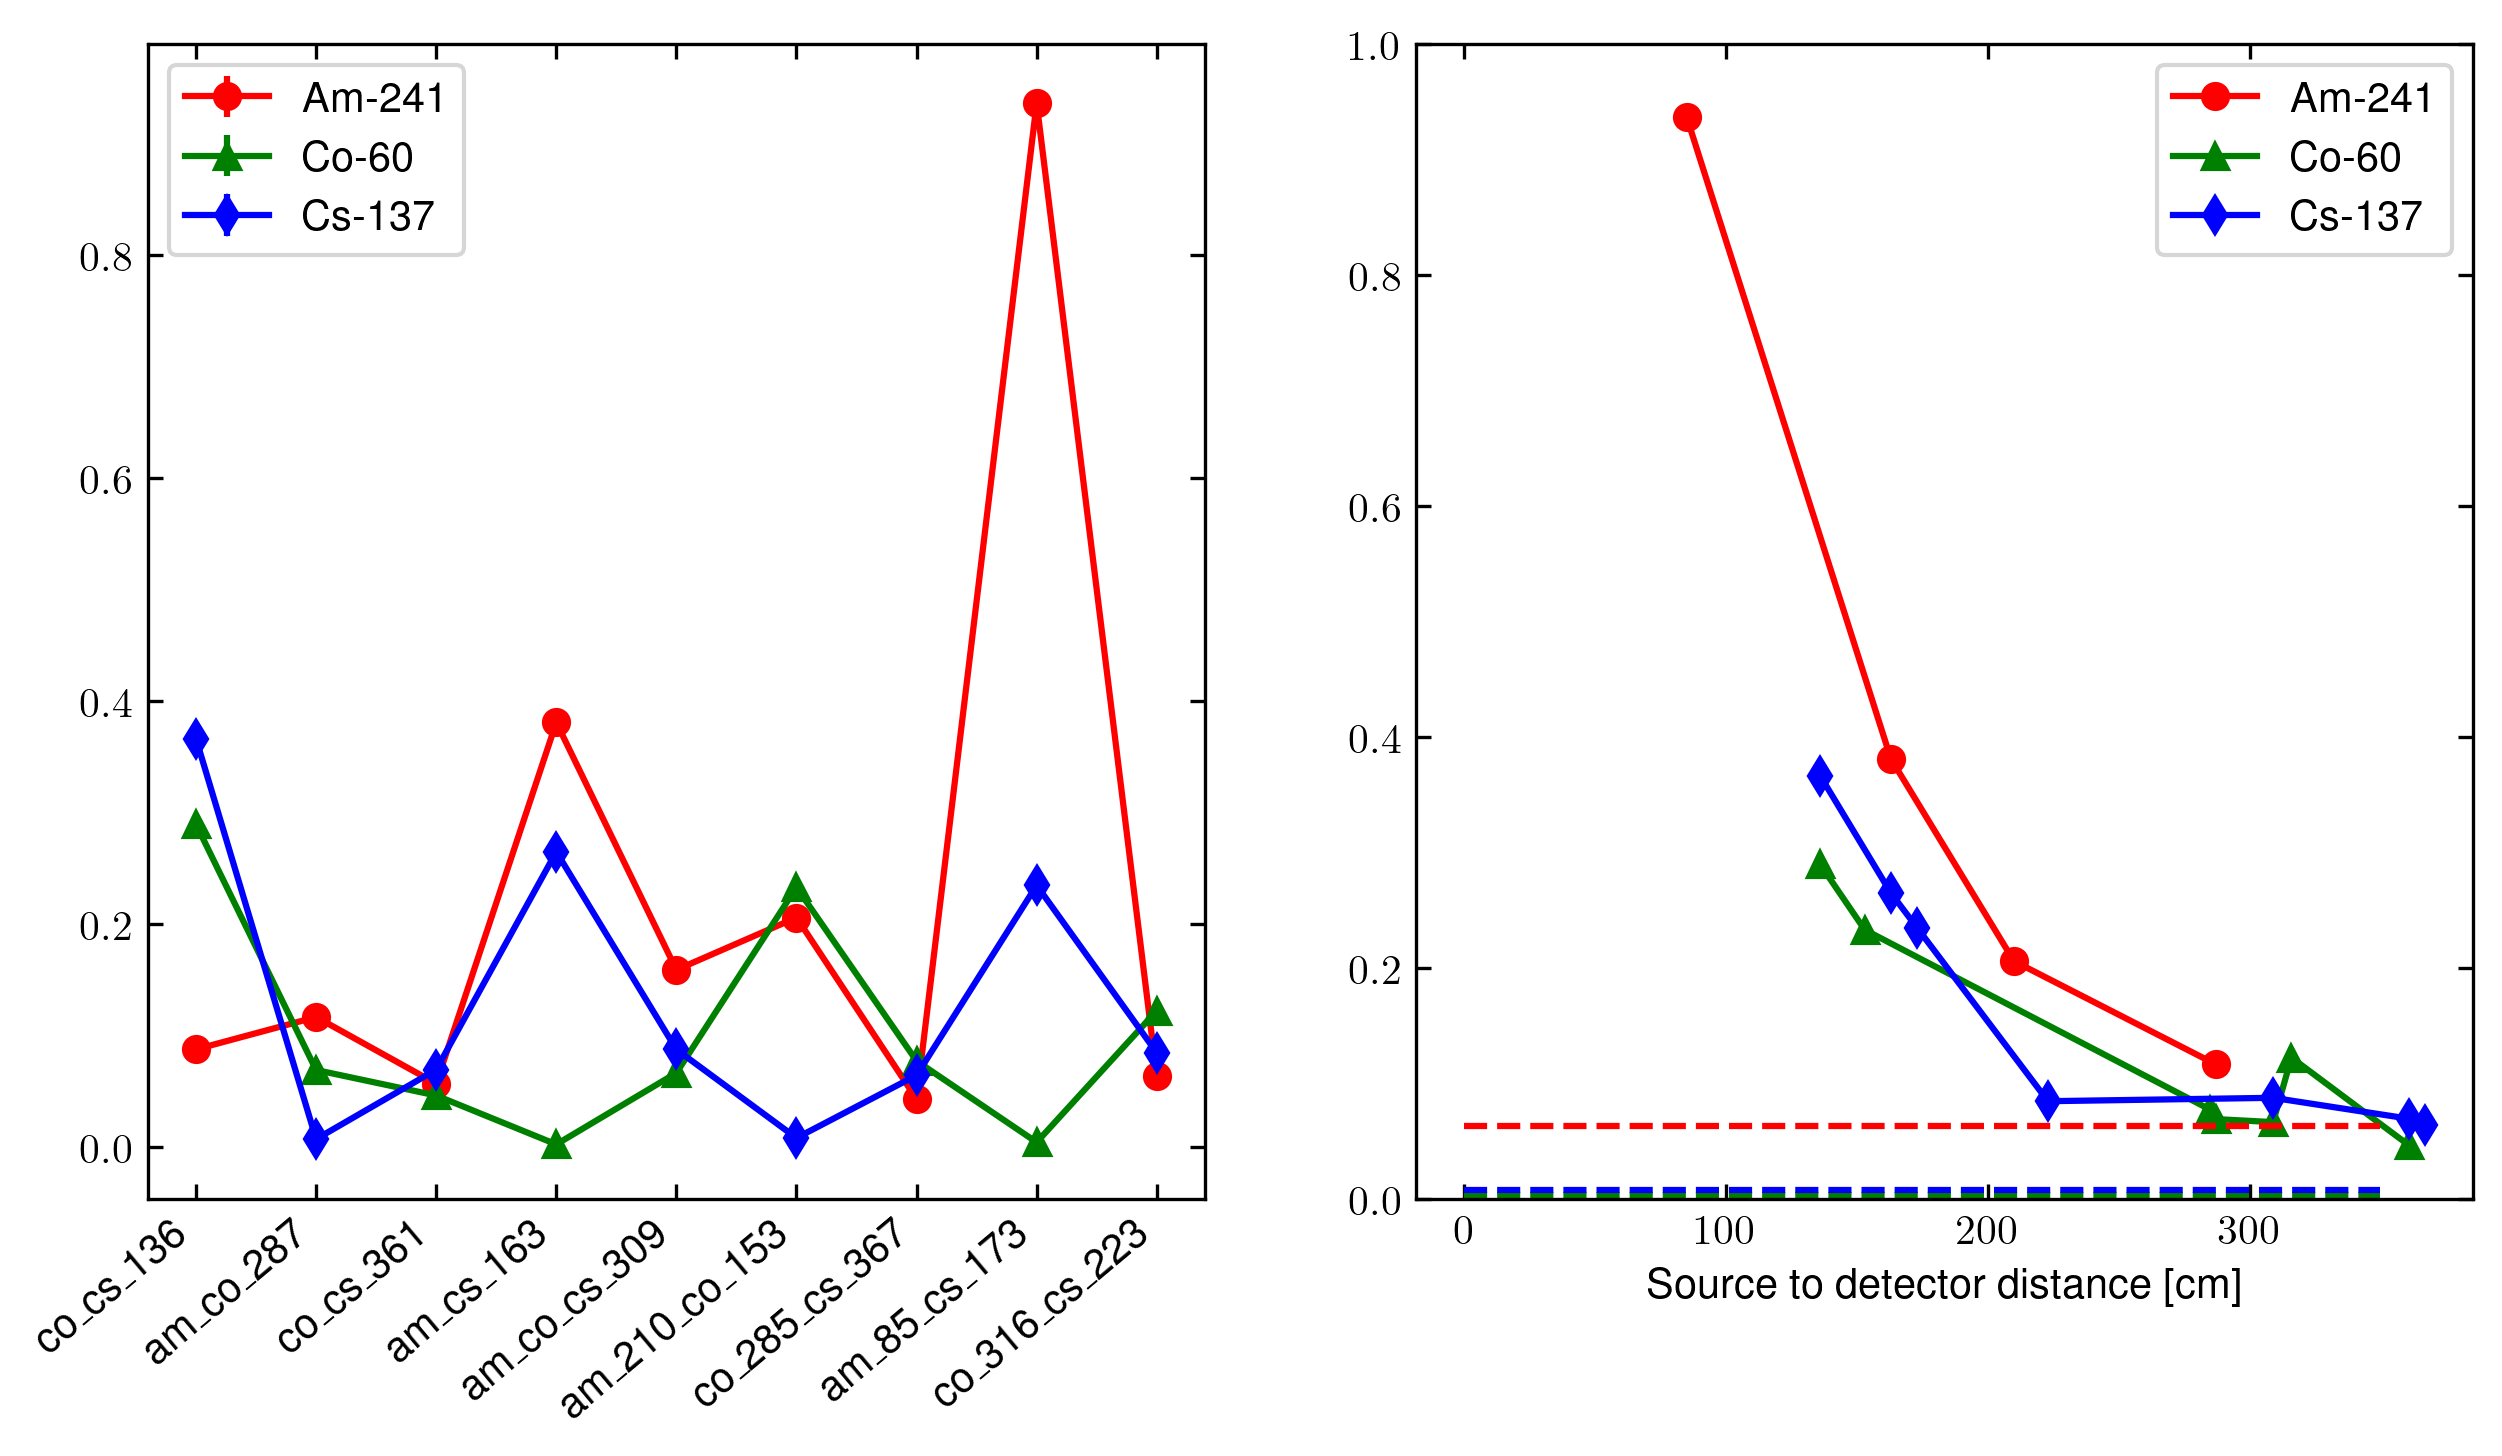

In [67]:
_refspecSub= {"Am" : BCCSSub1["am_80"], "Co" :BCCSSub1["co_60"], "Cs":BCCSSub1["cs_70"]}
mixed = ("co_cs_136", "am_co_287", "co_cs_361", "am_cs_163", "am_co_cs_309", "am_210_co_153",
         "co_285_cs_367", "am_85_cs_173", "co_316_cs_223")

BCCSFitSubResult0, BCCSFitSubResult = {}, {}
for kk in mixed :
     popt, se, pconv = BCCSfit((0.5, 0.5, 0.5), BCCSSub1[kk], _refspecSub, 200, False)
     BCCSFitSubResult0[kk] = (popt, se, pconv)
     BCCSFitSubResult[kk] = {}
     BCCSFitSubResult[kk]["am"] = [float(c) for c in (float(popt[0]), float(np.sqrt(se[0])))]
     BCCSFitSubResult[kk]["co"] = [float(c) for c in (float(popt[1]), float(np.sqrt(se[1])))]
     BCCSFitSubResult[kk]["cs"] = [float(c) for c in (float(popt[2]), float(np.sqrt(se[1])))]

v_am, v_co, v_cs, e_am, e_co, e_cs = [], [], [], [], [], []
for kk in mixed :
     v_am.append(BCCSFitSubResult[kk]["am"][0])
     e_am.append(BCCSFitSubResult[kk]["am"][1])
     v_co.append(BCCSFitSubResult[kk]["co"][0])
     e_co.append(BCCSFitSubResult[kk]["co"][1])
     v_cs.append(BCCSFitSubResult[kk]["cs"][0])
     e_cs.append(BCCSFitSubResult[kk]["cs"][1])

plt.figure(figsize=(10, 5), dpi = 300)
plt.subplot(121)
plt.errorbar(mixed, v_am, e_am, color="red", marker="o", label = "Am-241")
plt.errorbar(mixed, v_co, e_co, color="green", marker="^", label = "Co-60")
plt.errorbar(mixed, v_cs, e_cs, color="blue", marker="d", label = "Cs-137")
ax=plt.gca()
ax.set_xticks(np.arange(0, len(mixed)))
ax.set_xticklabels(mixed, rotation=40, ha='right')
# plt.yscale("log", base=10)
plt.legend()

plt.subplot(122)
amx = np.array([287, 163, 210, 85])
amy = np.array([BCCSFitSubResult["am_co_287"]["am"][0], BCCSFitSubResult["am_cs_163"]["am"][0], BCCSFitSubResult["am_210_co_153"]["am"][0], BCCSFitSubResult["am_85_cs_173"]["am"][0]])
sort_list = np.argsort(amx)
amx = amx[sort_list]
amy = amy[sort_list]
plt.plot(amx, amy, "ro-", label = "Am-241")

cox = np.array([136, 287, 361, 309, 153, 285, 316])
coy = np.array([BCCSFitSubResult["co_cs_136"]["co"][0], BCCSFitSubResult["am_co_287"]["co"][0], BCCSFitSubResult["co_cs_361"]["co"][0], BCCSFitSubResult["am_co_cs_309"]["co"][0], BCCSFitSubResult["am_210_co_153"]["co"][0], BCCSFitSubResult["co_285_cs_367"]["co"][0], BCCSFitSubResult["co_316_cs_223"]["co"][0]])
sort_list = np.argsort(cox)
cox = cox[sort_list]
coy = coy[sort_list]
plt.plot(cox, coy, "g^-", label = "Co-60")

csx = np.array([136, 361, 163, 309, 367, 173, 223])
csy = np.array([BCCSFitSubResult["co_cs_136"]["cs"][0], BCCSFitSubResult["co_cs_361"]["cs"][0], BCCSFitSubResult["am_cs_163"]["cs"][0], BCCSFitSubResult["am_co_cs_309"]["cs"][0], BCCSFitSubResult["co_285_cs_367"]["cs"][0], BCCSFitSubResult["am_85_cs_173"]["cs"][0], BCCSFitSubResult["co_316_cs_223"]["cs"][0]])
sort_list = np.argsort(csx)
csx = csx[sort_list]
csy = csy[sort_list]
plt.plot(csx, csy, "bd-", label = "Cs-137")

plt.ylim(0, 1)
plt.xlabel("Source to detector distance [cm]")

amzero, cozero, cszero, qs= [] , [], [], []

for ks in mixed :
     if "am" not in ks :
          amzero.append(BCCSFitSubResult[ks]["am"][0])
          
     if "co" not in ks :
          cozero.append(BCCSFitSubResult[ks]["co"][0])
          
     if "cs" not in ks :
          cszero.append(BCCSFitSubResult[ks]["cs"][0])
          qs.append(ks)

plt.hlines(np.mean(amzero),0, 350, "red", "dashed" )
plt.hlines(np.mean(cozero),0, 350, "green", "dashed" )
plt.hlines(np.mean(cszero),0, 350, "blue", "dashed" )

plt.legend()


In [66]:
print(BCCSFitSubResult)
print(amzero)

{'co_cs_136': {'am': [0.08766959951700815, 0.006005385301058325], 'co': [0.289579635771789, 0.0018310301066359644], 'cs': [0.36632444367709016, 0.0018310301066359644]}, 'am_co_287': {'am': [0.11666320493422803, 0.006005384576505767], 'co': [0.06912746706521215, 0.0018310301166441683], 'cs': [0.00714827660598806, 0.0018310301166441683]}, 'co_cs_361': {'am': [0.05691928535834179, 0.006005384928482842], 'co': [0.04625588174859541, 0.0018310301245170785], 'cs': [0.06939980498708398, 0.0018310301245170785]}, 'am_cs_163': {'am': [0.38100168788610195, 0.006005384781149804], 'co': [0.0023999243855155616, 0.0018310302361697138], 'cs': [0.2648736316710275, 0.0018310302361697138]}, 'am_co_cs_309': {'am': [0.158972446646435, 0.006005384647575071], 'co': [0.06649913547307013, 0.0018310301242355168], 'cs': [0.08754493443553846, 0.0018310301242355168]}, 'am_210_co_153': {'am': [0.2059209644190701, 0.006005384936270966], 'co': [0.23300341966994326, 0.001831030067319637], 'cs': [0.008164268851414188, 0

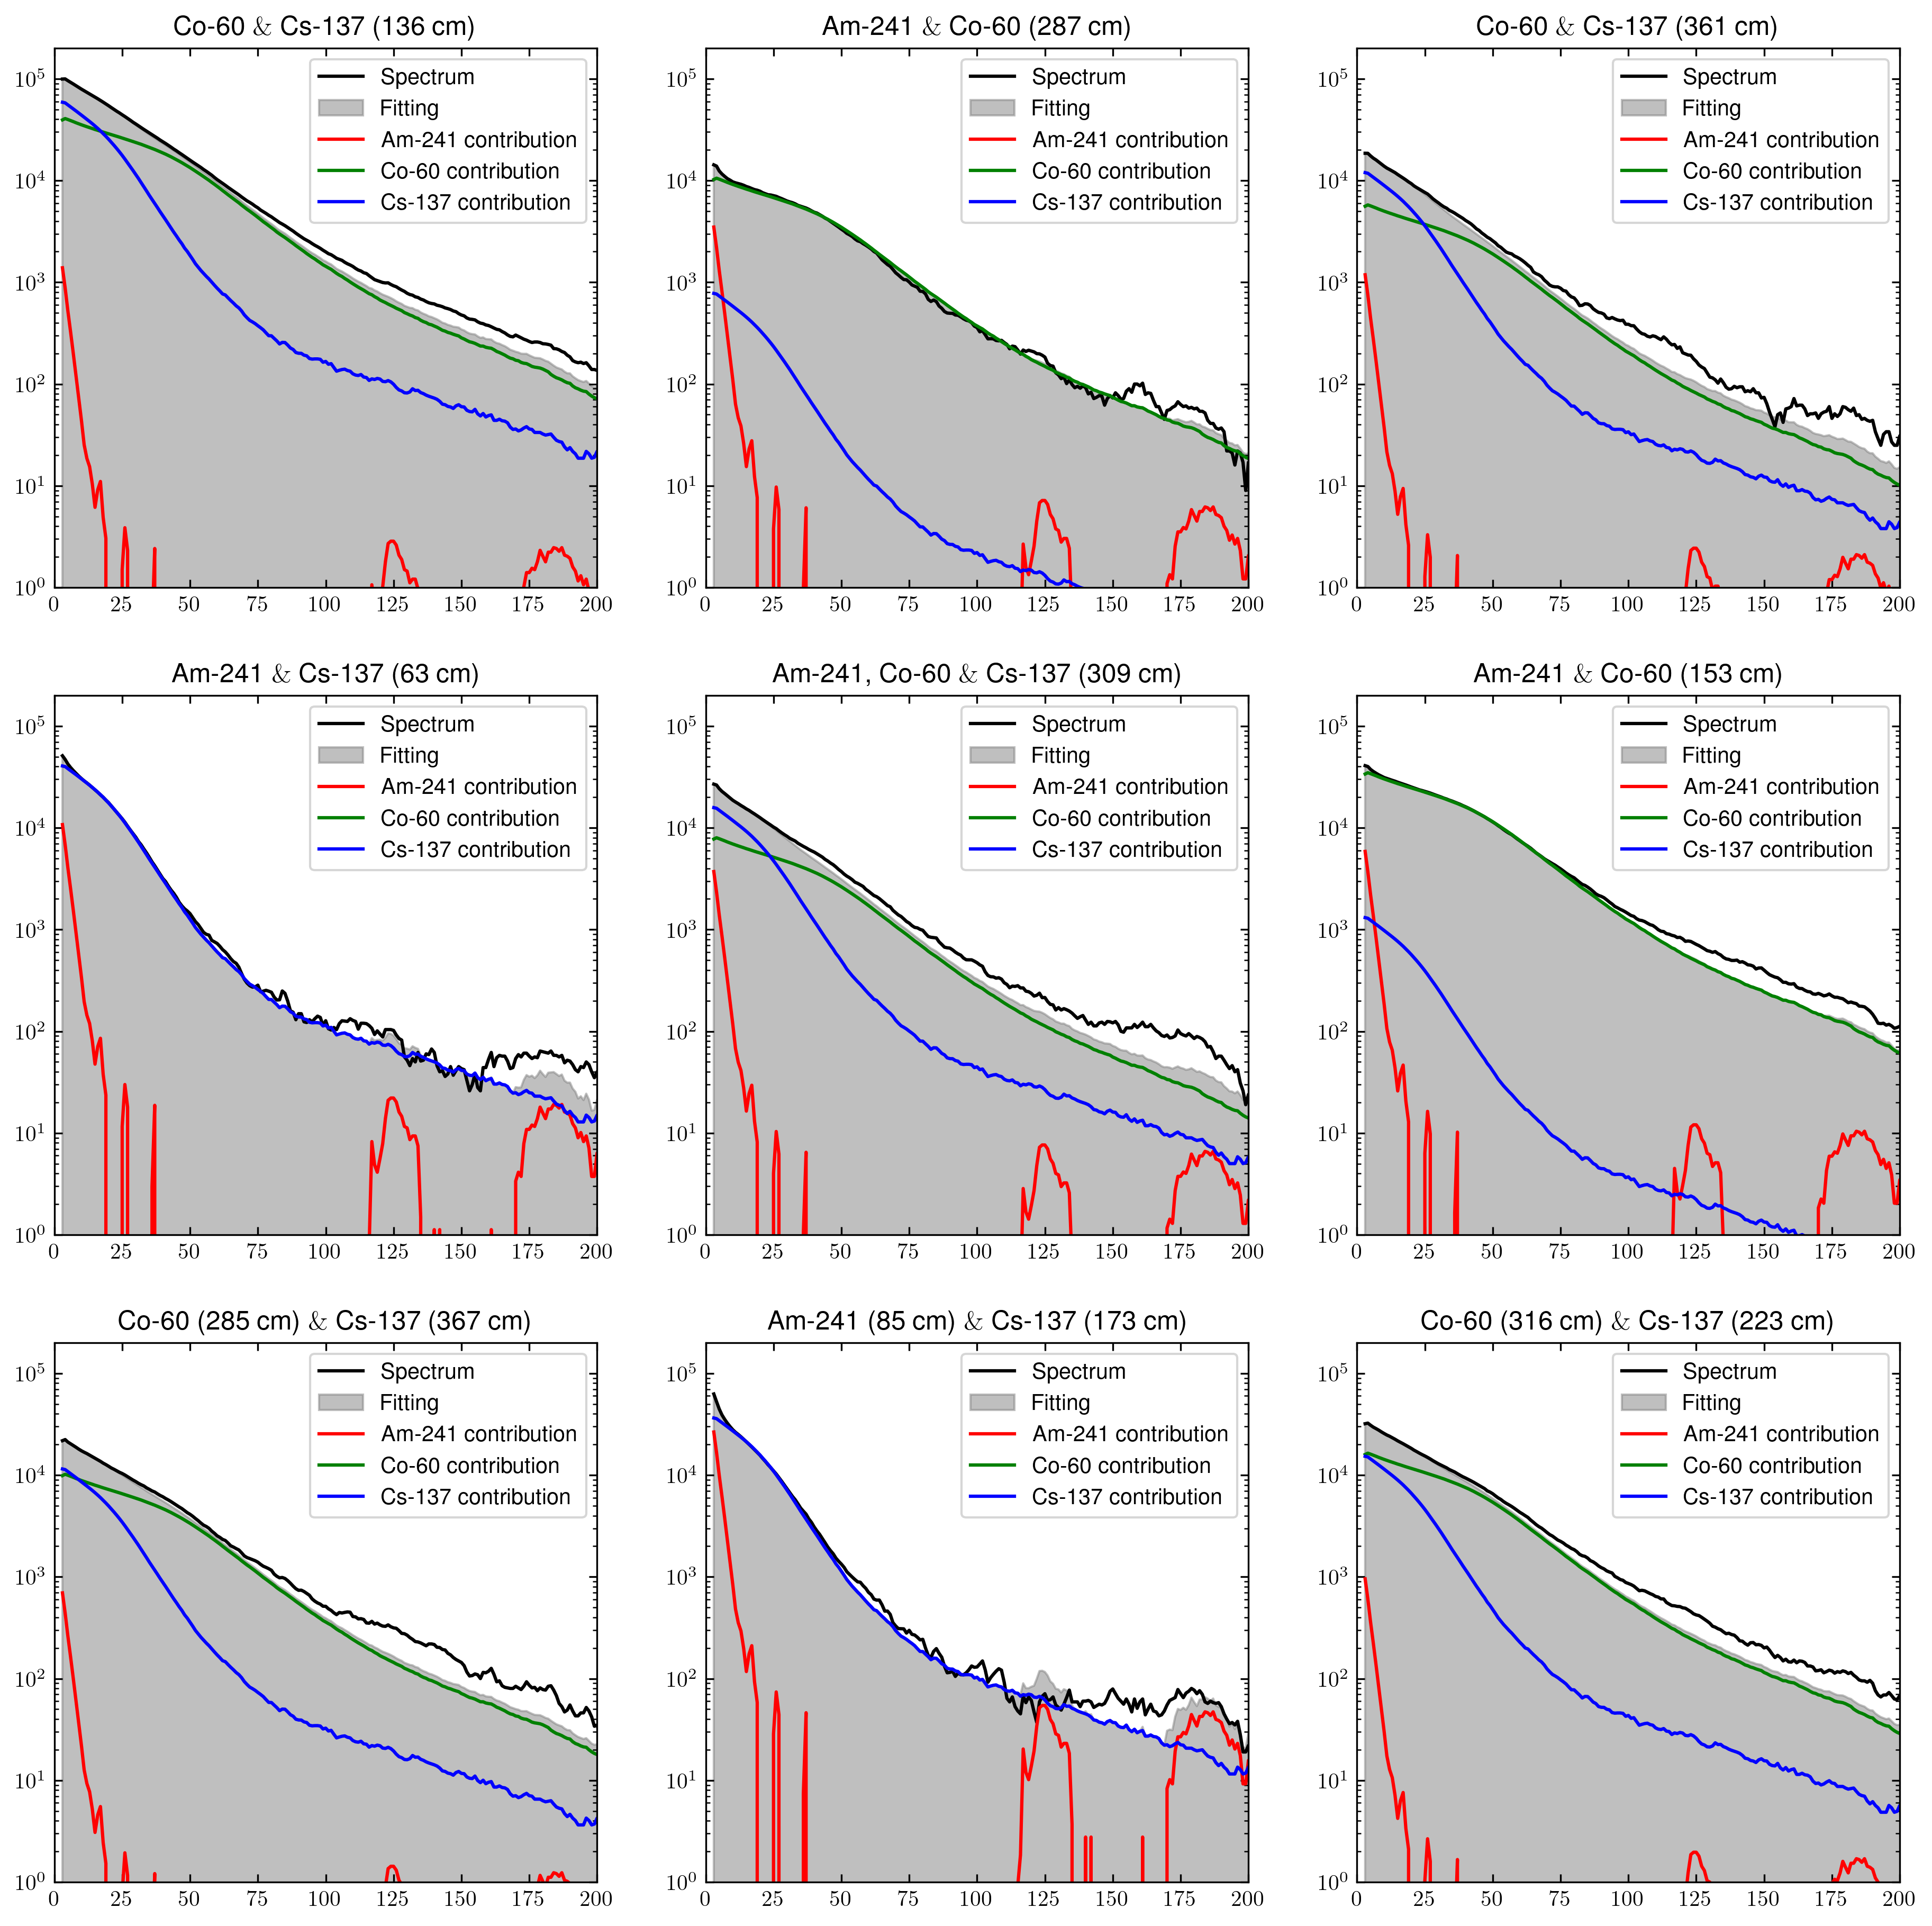

In [33]:
chan1, chan2 = 0, 200

plt.figure(figsize=(15, 15), dpi=300)
plt.subplot(331)
kk = "co_cs_136"
plt.plot(channel, BCCSSub1[kk], color="black", label = "Spectrum")
plt.fill_between(channel, BCCSFitSubResult[kk]['am'][0] * _refspecSub["Am"] + BCCSFitSubResult[kk]['co'][0] * _refspecSub["Co"] + BCCSFitSubResult[kk]['cs'][0]* _refspecSub["Cs"], color="gray", alpha=0.5, label = "Fitting")
plt.plot(channel, BCCSFitSubResult[kk]['am'][0] * _refspecSub["Am"], color="red", label = "Am-241 contribution")
plt.plot(channel, BCCSFitSubResult[kk]['co'][0] * _refspecSub["Co"], color="green", label = "Co-60 contribution")
plt.plot(channel, BCCSFitSubResult[kk]['cs'][0] * _refspecSub["Cs"], color="blue", label = "Cs-137 contribution")
plt.title("Co-60 $\\&$ Cs-137 (136 cm)")
plt.xlim(chan1, chan2)
plt.ylim(1, 2.0e5)
plt.yscale("log", base=10)
plt.legend(loc=1)

plt.subplot(332)
kk = "am_co_287"
plt.plot(channel, BCCSSub1[kk], color="black", label = "Spectrum")
plt.fill_between(channel, BCCSFitSubResult[kk]['am'][0] * _refspecSub["Am"] + BCCSFitSubResult[kk]['co'][0] * _refspecSub["Co"] + BCCSFitSubResult[kk]['cs'][0]* _refspecSub["Cs"], color="gray", alpha=0.5, label = "Fitting")
plt.plot(channel, BCCSFitSubResult[kk]['am'][0] * _refspecSub["Am"], color="red", label = "Am-241 contribution")
plt.plot(channel, BCCSFitSubResult[kk]['co'][0] * _refspecSub["Co"], color="green", label = "Co-60 contribution")
plt.plot(channel, BCCSFitSubResult[kk]['cs'][0] * _refspecSub["Cs"], color="blue", label = "Cs-137 contribution")
plt.title("Am-241 $\\&$ Co-60 (287 cm)")
plt.xlim(chan1, chan2)
plt.ylim(1, 2.0e5)
plt.yscale("log", base=10)
plt.legend()

plt.subplot(333)
kk = "co_cs_361"
plt.plot(channel, BCCSSub1[kk], color="black", label = "Spectrum")
plt.fill_between(channel, BCCSFitSubResult[kk]['am'][0] * _refspecSub["Am"] + BCCSFitSubResult[kk]['co'][0] * _refspecSub["Co"] + BCCSFitSubResult[kk]['cs'][0]* _refspecSub["Cs"], color="gray", alpha=0.5, label = "Fitting")
plt.plot(channel, BCCSFitSubResult[kk]['am'][0] * _refspecSub["Am"], color="red", label = "Am-241 contribution")
plt.plot(channel, BCCSFitSubResult[kk]['co'][0] * _refspecSub["Co"], color="green", label = "Co-60 contribution")
plt.plot(channel, BCCSFitSubResult[kk]['cs'][0] * _refspecSub["Cs"], color="blue", label = "Cs-137 contribution")
plt.title("Co-60 $\\&$ Cs-137 (361 cm)")
plt.xlim(chan1, chan2)
plt.ylim(1, 2.0e5)
plt.yscale("log", base=10)
plt.legend()

plt.subplot(334)
kk = 'am_cs_163'
plt.plot(channel, BCCSSub1[kk], color="black", label = "Spectrum")
plt.fill_between(channel, BCCSFitSubResult[kk]['am'][0] * _refspecSub["Am"] + BCCSFitSubResult[kk]['co'][0] * _refspecSub["Co"] + BCCSFitSubResult[kk]['cs'][0]* _refspecSub["Cs"], color="gray", alpha=0.5, label = "Fitting")
plt.plot(channel, BCCSFitSubResult[kk]['am'][0] * _refspecSub["Am"], color="red", label = "Am-241 contribution")
plt.plot(channel, BCCSFitSubResult[kk]['co'][0] * _refspecSub["Co"], color="green", label = "Co-60 contribution")
plt.plot(channel, BCCSFitSubResult[kk]['cs'][0] * _refspecSub["Cs"], color="blue", label = "Cs-137 contribution")
plt.title("Am-241 $\\&$ Cs-137 (63 cm)")
plt.xlim(chan1, chan2)
plt.ylim(1, 2.0e5)
plt.yscale("log", base=10)
plt.legend()

plt.subplot(335)
kk = 'am_co_cs_309'
plt.plot(channel, BCCSSub1[kk], color="black", label = "Spectrum")
plt.fill_between(channel, BCCSFitSubResult[kk]['am'][0] * _refspecSub["Am"] + BCCSFitSubResult[kk]['co'][0] * _refspecSub["Co"] + BCCSFitSubResult[kk]['cs'][0]* _refspecSub["Cs"], color="gray", alpha=0.5, label = "Fitting")
plt.plot(channel, BCCSFitSubResult[kk]['am'][0] * _refspecSub["Am"], color="red", label = "Am-241 contribution")
plt.plot(channel, BCCSFitSubResult[kk]['co'][0] * _refspecSub["Co"], color="green", label = "Co-60 contribution")
plt.plot(channel, BCCSFitSubResult[kk]['cs'][0] * _refspecSub["Cs"], color="blue", label = "Cs-137 contribution")
plt.title("Am-241, Co-60 $\\&$ Cs-137 (309 cm)")
plt.xlim(chan1, chan2)
plt.ylim(1, 2.0e5)
plt.yscale("log", base=10)
plt.legend()

plt.subplot(336)
kk = 'am_210_co_153'
plt.plot(channel, BCCSSub1[kk], color="black", label = "Spectrum")
plt.fill_between(channel, BCCSFitSubResult[kk]['am'][0] * _refspecSub["Am"] + BCCSFitSubResult[kk]['co'][0] * _refspecSub["Co"] + BCCSFitSubResult[kk]['cs'][0]* _refspecSub["Cs"], color="gray", alpha=0.5, label = "Fitting")
plt.plot(channel, BCCSFitSubResult[kk]['am'][0] * _refspecSub["Am"], color="red", label = "Am-241 contribution")
plt.plot(channel, BCCSFitSubResult[kk]['co'][0] * _refspecSub["Co"], color="green", label = "Co-60 contribution")
plt.plot(channel, BCCSFitSubResult[kk]['cs'][0] * _refspecSub["Cs"], color="blue", label = "Cs-137 contribution")
plt.xlim(chan1, chan2)
plt.title("Am-241 $\\&$ Co-60 (153 cm)")
plt.ylim(1, 2.0e5)
plt.yscale("log", base=10)
plt.legend(loc=1)

plt.subplot(337)
kk = 'co_285_cs_367'
plt.plot(channel, BCCSSub1[kk], color="black", label = "Spectrum")
plt.fill_between(channel, BCCSFitSubResult[kk]['am'][0] * _refspecSub["Am"] + BCCSFitSubResult[kk]['co'][0] * _refspecSub["Co"] + BCCSFitSubResult[kk]['cs'][0]* _refspecSub["Cs"], color="gray", alpha=0.5, label = "Fitting")
plt.plot(channel, BCCSFitSubResult[kk]['am'][0] * _refspecSub["Am"], color="red", label = "Am-241 contribution")
plt.plot(channel, BCCSFitSubResult[kk]['co'][0] * _refspecSub["Co"], color="green", label = "Co-60 contribution")
plt.plot(channel, BCCSFitSubResult[kk]['cs'][0] * _refspecSub["Cs"], color="blue", label = "Cs-137 contribution")
plt.title("Co-60 (285 cm) $\\&$ Cs-137 (367 cm)")
plt.xlim(chan1, chan2)
plt.ylim(1, 2.0e5)
plt.yscale("log", base=10)
plt.legend()

plt.subplot(338)
kk = 'am_85_cs_173'
plt.plot(channel, BCCSSub1[kk], color="black", label = "Spectrum")
plt.fill_between(channel, BCCSFitSubResult[kk]['am'][0] * _refspecSub["Am"] + BCCSFitSubResult[kk]['co'][0] * _refspecSub["Co"] + BCCSFitSubResult[kk]['cs'][0]* _refspecSub["Cs"], color="gray", alpha=0.5, label = "Fitting")
plt.plot(channel, BCCSFitSubResult[kk]['am'][0] * _refspecSub["Am"], color="red", label = "Am-241 contribution")
plt.plot(channel, BCCSFitSubResult[kk]['co'][0] * _refspecSub["Co"], color="green", label = "Co-60 contribution")
plt.plot(channel, BCCSFitSubResult[kk]['cs'][0] * _refspecSub["Cs"], color="blue", label = "Cs-137 contribution")
plt.title("Am-241 (85 cm) $\\&$ Cs-137 (173 cm)")
plt.xlim(chan1, chan2)
plt.ylim(1, 2.0e5)
plt.yscale("log", base=10)
plt.legend()

plt.subplot(339)
kk = 'co_316_cs_223'
plt.plot(channel, BCCSSub1[kk], color="black", label = "Spectrum")
plt.fill_between(channel, BCCSFitSubResult[kk]['am'][0] * _refspecSub["Am"] + BCCSFitSubResult[kk]['co'][0] * _refspecSub["Co"] + BCCSFitSubResult[kk]['cs'][0]* _refspecSub["Cs"], color="gray", alpha=0.5, label = "Fitting")
plt.plot(channel, BCCSFitSubResult[kk]['am'][0] * _refspecSub["Am"], color="red", label = "Am-241 contribution")
plt.plot(channel, BCCSFitSubResult[kk]['co'][0] * _refspecSub["Co"], color="green", label = "Co-60 contribution")
plt.plot(channel, BCCSFitSubResult[kk]['cs'][0] * _refspecSub["Cs"], color="blue", label = "Cs-137 contribution")
plt.title( "Co-60 (316 cm) $\\&$ Cs-137 (223 cm)")
plt.xlim(chan1, chan2)
plt.ylim(1, 2.0e5)
plt.yscale("log", base=10)
plt.legend()

#plt.savefig("../../draft_20250925/figure/fit_BGSub.pdf")

In [ ]:
_refspecRto= {"Am" : BCCSRto1["am_80"], "Co" :BCCSRto1["co_60"], "Cs":BCCSRto1["cs_70"]}
mixed = ("co_cs_136", "am_co_287", "co_cs_361", "am_cs_63", "am_co_cs_309", "am_210_co_153",
         "co_285_cs_367", "am_85_cs_173", "co_316_cs_223")

# BCCSFitRtoResult = {}
# for kk in mixed :
#      BCCSFitRtoResult[kk] = BCCSfit((0.5, 0.5, 0.5), BCCSRto1[kk], _refspecRto, 100, False)

BCCSFitRtoResult0, BCCSFitRtoResult = {}, {}
for kk in mixed :
     popt2, se2, pconv2 = BCCSfit((0.5, 0.5, 0.5), BCCSRto1[kk], _refspecRto, 100, False)
     BCCSFitRtoResult0[kk] = (popt2, se2, pconv2)
     BCCSFitRtoResult[kk] = {}
     BCCSFitRtoResult[kk]["am"] = [float(c) for c in (float(popt2[0]), float(np.sqrt(se2[0])))]
     BCCSFitRtoResult[kk]["co"] = [float(c) for c in (float(popt2[1]), float(np.sqrt(se2[1])))]
     BCCSFitRtoResult[kk]["cs"] = [float(c) for c in (float(popt2[2]), float(np.sqrt(se2[2])))]

v_am, v_co, v_cs, e_am, e_co, e_cs = [], [], [], [], [], []
for kk in mixed :
     v_am.append(BCCSFitRtoResult[kk]["am"][0])
     e_am.append(BCCSFitRtoResult[kk]["am"][1])
     v_co.append(BCCSFitRtoResult[kk]["co"][0])
     e_co.append(BCCSFitRtoResult[kk]["co"][1])
     v_cs.append(BCCSFitRtoResult[kk]["cs"][0])
     e_cs.append(BCCSFitRtoResult[kk]["cs"][1])

#plt.errorbar(mixed, v_am, e_am, color="red", marker="o", label = "Am-241")
plt.plot(mixed, v_am, color="red", marker="o", label = "Am-241")
plt.errorbar(mixed, v_co, e_co, color="green", marker="^", label = "Co-60")
plt.errorbar(mixed, v_cs, e_cs, color="blue", marker="d", label = "Cs-137")
ax=plt.gca()
ax.set_xticks(np.arange(0, len(mixed)))
ax.set_xticklabels(mixed, rotation=40, ha='right')
# plt.yscale("log", base=10)
plt.legend()

In [ ]:
BCCSFitRtoResult

In [ ]:
chan1, chan2 = 0, 200
y0, y1 = 0, 2
plt.figure(figsize=(15, 15))#, dpi=300)
plt.subplot(331)
kk = "co_cs_136"
plt.plot(channel, BCCSRto1[kk], color="black", label = "Spectrum")
plt.fill_between(channel, BCCSFitRtoResult[kk]['am'][0] * _refspecRto["Am"] + BCCSFitRtoResult[kk]['co'][0] * _refspecRto["Co"] + BCCSFitRtoResult[kk]['cs'][0] * _refspecRto["Cs"], color="gray", alpha=0.5, label = "Fitting")
plt.plot(channel, BCCSFitRtoResult[kk]['am'][0] * _refspecRto["Am"], color = "red", label = "Am-241 contribution")
plt.plot(channel, BCCSFitRtoResult[kk]['co'][0] * _refspecRto["Co"], color = "green", label = "Co-60 contribution")
plt.plot(channel, BCCSFitRtoResult[kk]['cs'][0] * _refspecRto["Cs"], color = "blue", label = "Cs-137 contribution")
plt.title("Co-60 $\\&$ Cs-137 (136 cm)")
plt.xlim(chan1, chan2)
plt.ylim(y0, y1)
# plt.yscale("log", base=10)

plt.legend()

plt.subplot(332)
kk = "am_co_287"
plt.plot(channel, BCCSRto1[kk], color="black", label = "Spectrum")
plt.fill_between(channel, BCCSFitRtoResult[kk]['am'][0] * _refspecRto["Am"] + BCCSFitRtoResult[kk]['co'][0] * _refspecRto["Co"] + BCCSFitRtoResult[kk]['cs'][0] * _refspecRto["Cs"], color="gray", alpha=0.5, label = "Fitting")
plt.plot(channel, BCCSFitRtoResult[kk]['am'][0] * _refspecRto["Am"], color = "red", label = "Am-241 contribution")
plt.plot(channel, BCCSFitRtoResult[kk]['co'][0] * _refspecRto["Co"], color = "green", label = "Co-60 contribution")
plt.plot(channel, BCCSFitRtoResult[kk]['cs'][0] * _refspecRto["Cs"], color = "blue", label = "Cs-137 contribution")
plt.title("Am-241 $\\&$ Co-60 (287 cm)")
plt.xlim(chan1, chan2)
plt.ylim(y0, y1)
# plt.yscale("log", base=10)
plt.legend()

plt.subplot(333)
kk = "co_cs_361"
plt.plot(channel, BCCSRto1[kk], color="black", label = "Spectrum")
plt.fill_between(channel, BCCSFitRtoResult[kk]['am'][0] * _refspecRto["Am"] + BCCSFitRtoResult[kk]['co'][0] * _refspecRto["Co"] + BCCSFitRtoResult[kk]['cs'][0] * _refspecRto["Cs"], color="gray", alpha=0.5, label = "Fitting")
plt.plot(channel, BCCSFitRtoResult[kk]['am'][0] * _refspecRto["Am"], color = "red", label = "Am-241 contribution")
plt.plot(channel, BCCSFitRtoResult[kk]['co'][0] * _refspecRto["Co"], color = "green", label = "Co-60 contribution")
plt.plot(channel, BCCSFitRtoResult[kk]['cs'][0] * _refspecRto["Cs"], color = "blue", label = "Cs-137 contribution")
plt.title("Co-60 $\\&$ Cs-137 (361 cm)")
plt.xlim(chan1, chan2)
plt.ylim(y0, y1)
# plt.yscale("log", base=10)
plt.legend()

plt.subplot(334)
kk = 'am_cs_63'
plt.plot(channel, BCCSRto1[kk], color="black", label = "Spectrum")
plt.fill_between(channel, BCCSFitRtoResult[kk]['am'][0] * _refspecRto["Am"] + BCCSFitRtoResult[kk]['co'][0] * _refspecRto["Co"] + BCCSFitRtoResult[kk]['cs'][0] * _refspecRto["Cs"], color="gray", alpha=0.5, label = "Fitting")
plt.plot(channel, BCCSFitRtoResult[kk]['am'][0] * _refspecRto["Am"], color = "red", label = "Am-241 contribution")
plt.plot(channel, BCCSFitRtoResult[kk]['co'][0] * _refspecRto["Co"], color = "green", label = "Co-60 contribution")
plt.plot(channel, BCCSFitRtoResult[kk]['cs'][0] * _refspecRto["Cs"], color = "blue", label = "Cs-137 contribution")
plt.title( "Am-241 $\\&$ Cs-137 (63 cm)")
plt.xlim(chan1, chan2)
plt.ylim(y0, y1)
# plt.yscale("log", base=10)
plt.legend()

plt.subplot(335)
kk = 'am_co_cs_309'
plt.plot(channel, BCCSRto1[kk], color="black", label = "Spectrum")
plt.fill_between(channel, BCCSFitRtoResult[kk]['am'][0] * _refspecRto["Am"] + BCCSFitRtoResult[kk]['co'][0] * _refspecRto["Co"] + BCCSFitRtoResult[kk]['cs'][0] * _refspecRto["Cs"], color="gray", alpha=0.5, label = "Fitting")
plt.plot(channel, BCCSFitRtoResult[kk]['am'][0] * _refspecRto["Am"], color = "red", label = "Am-241 contribution")
plt.plot(channel, BCCSFitRtoResult[kk]['co'][0] * _refspecRto["Co"], color = "green", label = "Co-60 contribution")
plt.plot(channel, BCCSFitRtoResult[kk]['cs'][0] * _refspecRto["Cs"], color = "blue", label = "Cs-137 contribution")
plt.title("Am-241, Co-60 $\\&$ Cs-137 (309 cm)")
plt.xlim(chan1, chan2)
plt.ylim(y0, y1)
#plt.yscale("log", base=10)
plt.legend()

plt.subplot(336)
kk = 'am_210_co_153'
plt.plot(channel, BCCSRto1[kk], color="black", label = "Spectrum")
plt.fill_between(channel, BCCSFitRtoResult[kk]['am'][0] * _refspecRto["Am"] + BCCSFitRtoResult[kk]['co'][0] * _refspecRto["Co"] + BCCSFitRtoResult[kk]['cs'][0] * _refspecRto["Cs"], color="gray", alpha=0.5, label = "Fitting")
plt.plot(channel, BCCSFitRtoResult[kk]['am'][0] * _refspecRto["Am"], color = "red", label = "Am-241 contribution")
plt.plot(channel, BCCSFitRtoResult[kk]['co'][0] * _refspecRto["Co"], color = "green", label = "Co-60 contribution")
plt.plot(channel, BCCSFitRtoResult[kk]['cs'][0] * _refspecRto["Cs"], color = "blue", label = "Cs-137 contribution")
plt.title("Am-241 (210 cm) $\\&$ Co-60 (153 cm)")
plt.xlim(chan1, chan2)
plt.ylim(y0, y1)
plt.legend(loc=1)

plt.subplot(337)
kk = 'co_285_cs_367'
plt.plot(channel, BCCSRto1[kk], color="black", label = "Spectrum")
plt.fill_between(channel, BCCSFitRtoResult[kk]['am'][0] * _refspecRto["Am"] + BCCSFitRtoResult[kk]['co'][0] * _refspecRto["Co"] + BCCSFitRtoResult[kk]['cs'][0] * _refspecRto["Cs"], color="gray", alpha=0.5, label = "Fitting")
plt.plot(channel, BCCSFitRtoResult[kk]['am'][0] * _refspecRto["Am"], color = "red", label = "Am-241 contribution")
plt.plot(channel, BCCSFitRtoResult[kk]['co'][0] * _refspecRto["Co"], color = "green", label = "Co-60 contribution")
plt.plot(channel, BCCSFitRtoResult[kk]['cs'][0] * _refspecRto["Cs"], color = "blue", label = "Cs-137 contribution")
plt.title("Co-60 (258 cm) $\\&$ Cs-137 (367 cm)")
plt.xlim(chan1, chan2)
plt.ylim(y0, y1)
# plt.yscale("log", base=10)
plt.legend()

plt.subplot(338)
kk = 'am_85_cs_173'
plt.plot(channel, BCCSRto1[kk], color="black", label = "Spectrum")
plt.fill_between(channel, BCCSFitRtoResult[kk]['am'][0] * _refspecRto["Am"] + BCCSFitRtoResult[kk]['co'][0] * _refspecRto["Co"] + BCCSFitRtoResult[kk]['cs'][0] * _refspecRto["Cs"], color="gray", alpha=0.5, label = "Fitting")
plt.plot(channel, BCCSFitRtoResult[kk]['am'][0] * _refspecRto["Am"], color = "red", label = "Am-241 contribution")
plt.plot(channel, BCCSFitRtoResult[kk]['co'][0] * _refspecRto["Co"], color = "green", label = "Co-60 contribution")
plt.plot(channel, BCCSFitRtoResult[kk]['cs'][0] * _refspecRto["Cs"], color = "blue", label = "Cs-137 contribution")
plt.title("Am-241 (85 cm)$\\&$ Cs-137 (173 cm)")
plt.xlim(chan1, chan2)
plt.ylim(y0, y1)
# plt.yscale("log", base=10)
plt.legend()

plt.subplot(339)
kk = 'co_316_cs_223'
plt.plot(channel, BCCSRto1[kk], color="black", label = "Spectrum")
plt.fill_between(channel, BCCSFitRtoResult[kk]['am'][0] * _refspecRto["Am"] + BCCSFitRtoResult[kk]['co'][0] * _refspecRto["Co"] + BCCSFitRtoResult[kk]['cs'][0] * _refspecRto["Cs"], color="gray", alpha=0.5, label = "Fitting")
plt.plot(channel, BCCSFitRtoResult[kk]['am'][0] * _refspecRto["Am"], color = "red", label = "Am-241 contribution")
plt.plot(channel, BCCSFitRtoResult[kk]['co'][0] * _refspecRto["Co"], color = "green", label = "Co-60 contribution")
plt.plot(channel, BCCSFitRtoResult[kk]['cs'][0] * _refspecRto["Cs"], color = "blue", label = "Cs-137 contribution")
plt.title("Co-60 (316 cm) $\\&$ Cs-137 (223 cm)")
plt.xlim(chan1, chan2)
plt.ylim(y0, y1)
# plt.yscale("log", base=10)
plt.legend()

#plt.savefig("../../draft_20250925/figure/fit_BGRto.pdf")

In [ ]:
xx = np.array([1,2,3,-4,1,2,3-2, 3,3,])
xx[xx < 0] = 0

In [ ]:
xx